#  Machine Learning project (2021-2022)

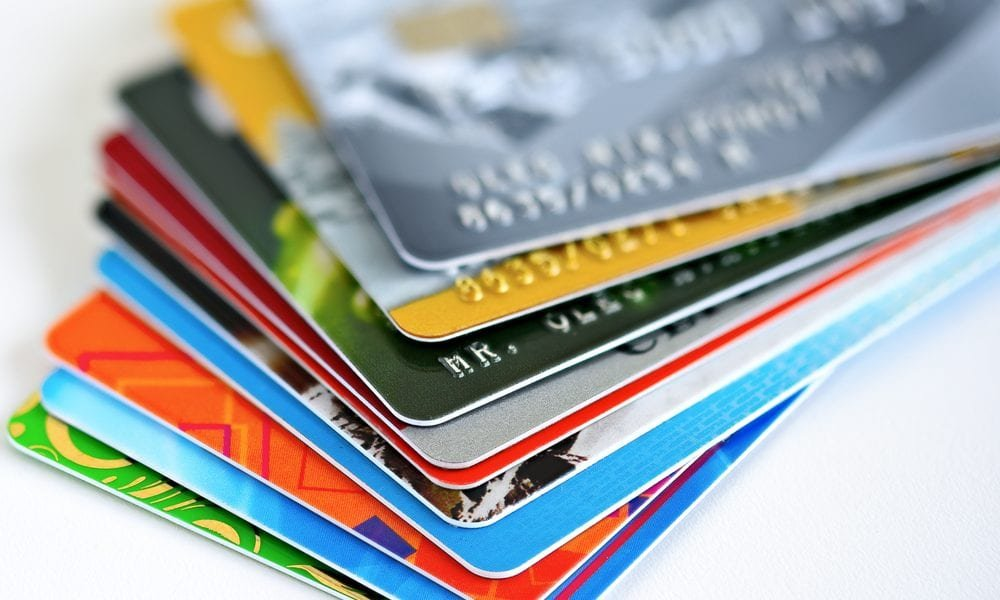

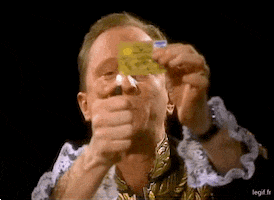

## About the Data

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-2: No consumption
 -1: Paid in full
 0: The use of revolving credit
1 = payment delay for one month
2 = payment delay for two months
 . . .
8 = payment delay for eight months;
9 = payment delay for nine months and above.
)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

## packages

In [1410]:
!pip install catboost
!pip install xgboost
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import Pool



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import svm
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import time


## Load Data

In [1411]:
#display the 5 first rows
df=pd.read_csv('Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

# Understand the Data

In [1412]:
#get information about the data (how many non null value , the type of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [1413]:
# our data it's about numbers so we implement this command to get some informations about our columns
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [1414]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [1415]:
# to know how many NaN value in our Data
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [1416]:
# to know how many rows and columns we have
df.shape

(30000, 25)

## DEFAULT

In [1417]:
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)

In [1418]:
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

the paper said that they have 25000 clear row but we have 30000 so we have 5000 dirty data 
5529 observations (22.12%) are the cardholders with default payment. so we have 1107 dirty data with value 1
and we have 3893 dirty data with 0 

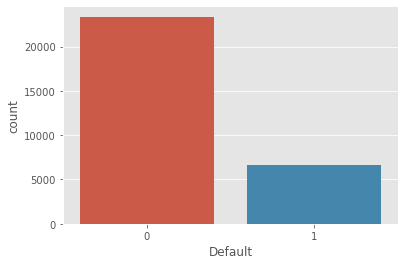

In [1419]:
sns.countplot(x='Default', data=df)
plt.show()

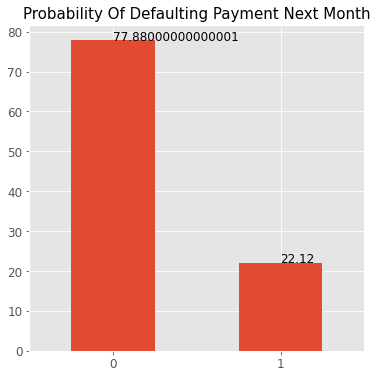

In [1420]:
def_cnt = (df.Default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

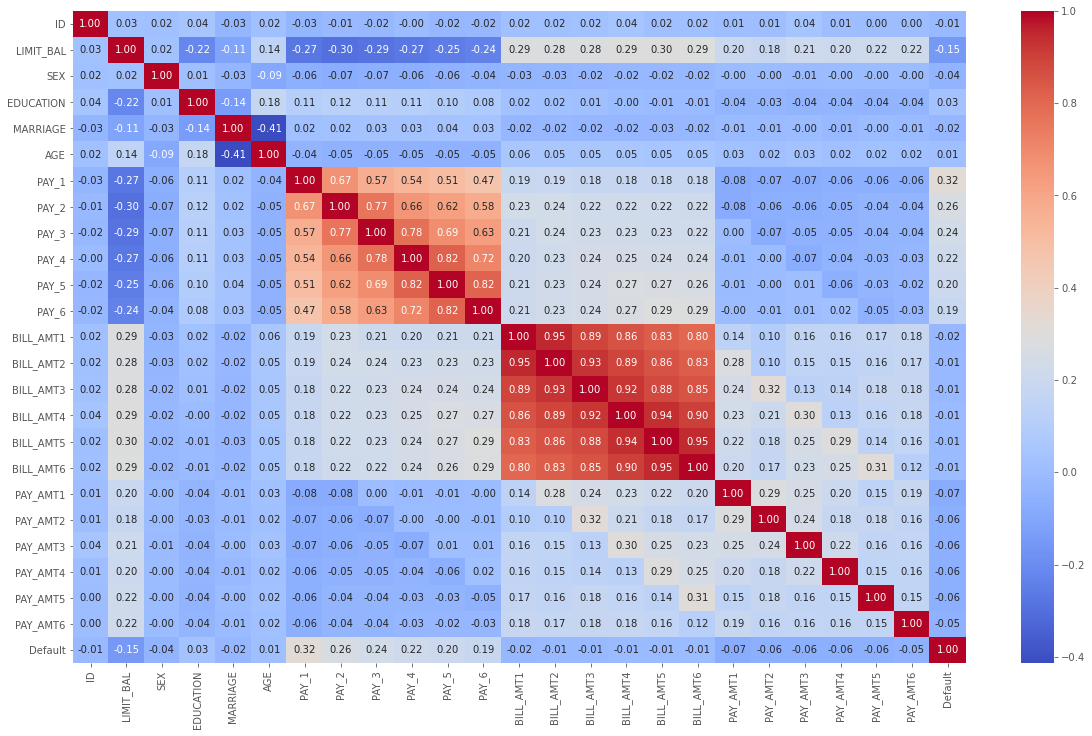

In [1421]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

## AGE

C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


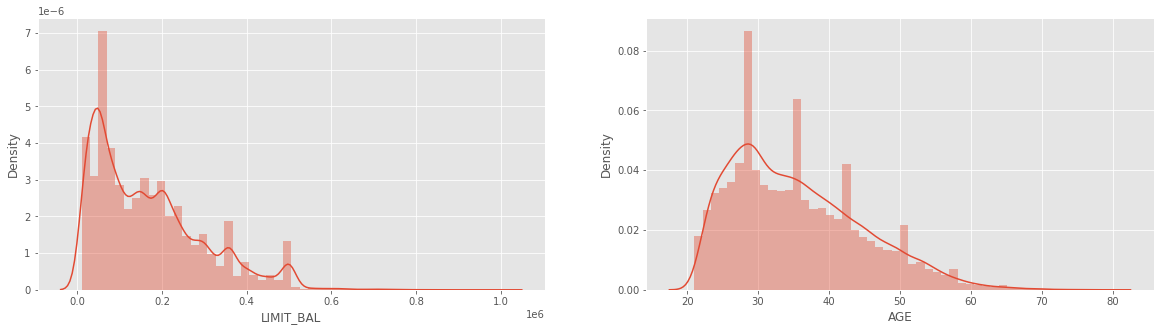

In [1422]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

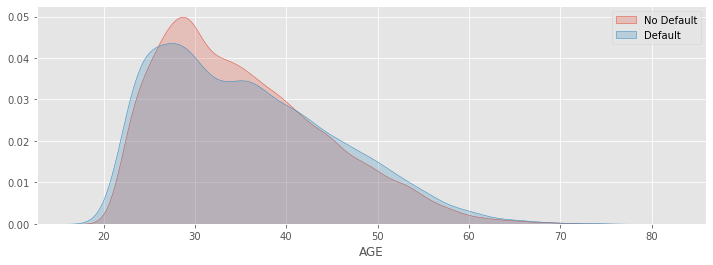

In [1423]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

In [1424]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [1425]:
df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)


AgeBin    Default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: Default, dtype: float64

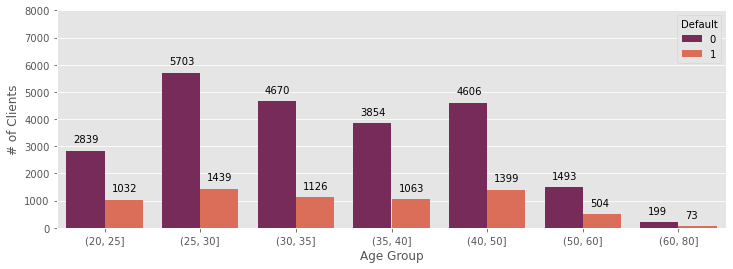

In [1426]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

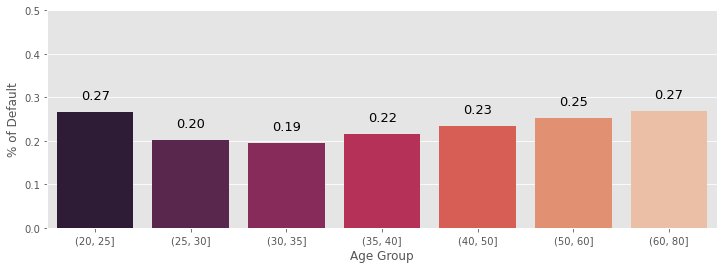

In [1427]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "Default", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, the lowest chances of default are registered around 30-35 years old, while the highest occur at the extremes (20-25 and 60+).



## MARRIAGE

In [1428]:
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [1429]:
df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)


MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: Default, dtype: float64

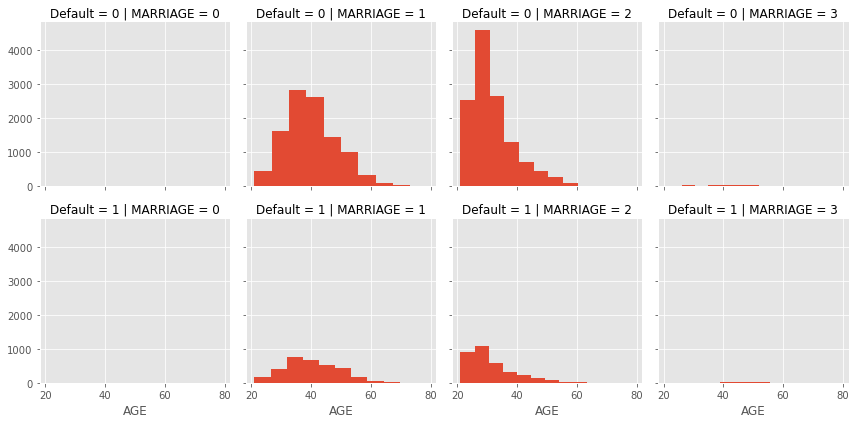

In [1430]:
g = sns.FacetGrid(df, row='Default', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

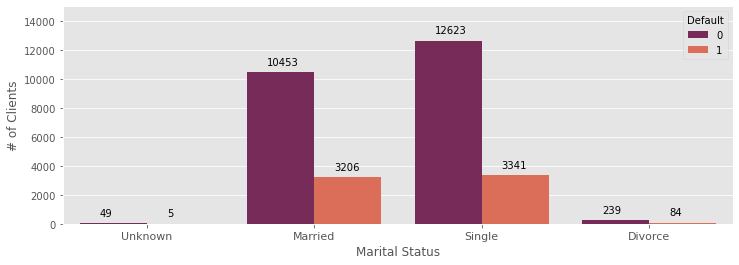

In [1431]:

plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

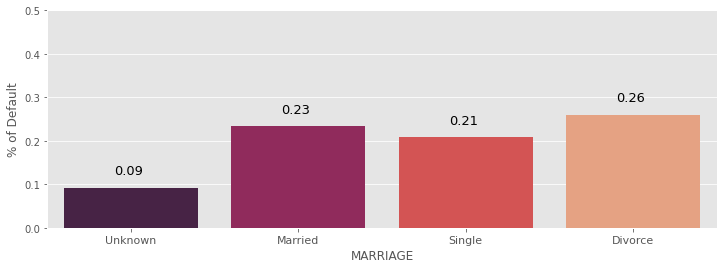

In [1432]:

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, most people fall either on the 'Married' or 'Single' category.

Once again, the 'Unknown' category present a lower probability of default. Among the rest, those who are single have a slight lower chance of default, while the people who got divorced are more likely to default.

## SEX

In [1433]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

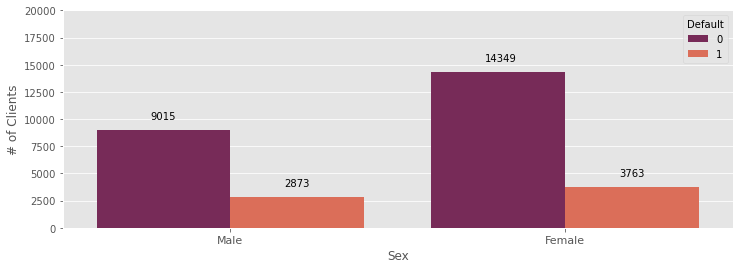

In [1434]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

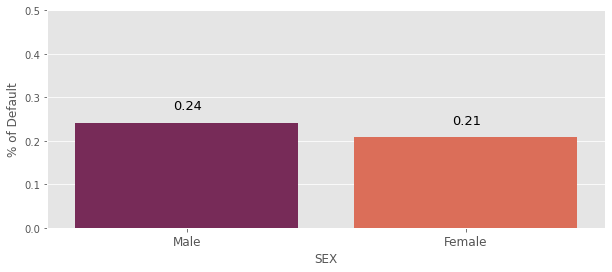

In [1435]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. We will try to confirm it a little later by comparing men and women with the same education and marital status.



## EDUCATION

As we saw on the descriptive statistics (df.describe), there is a minimum value of 0 in 'Education', which didn't match the possible values for this feature according to the original dataset information. The additional information puts 4 values (0, 4, 5, 6) in the same category ('others').

The values '5' and '6' are both originally labelled as 'unknown' and we don't have a defined label for '0'. Maybe we can put them all together in the same category. But first, we will leave it as it is for now and check how many samples there are in each category and what is their percentage of Default.

In [1436]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [1437]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)


EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: Default, dtype: float64

In [1438]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [1439]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

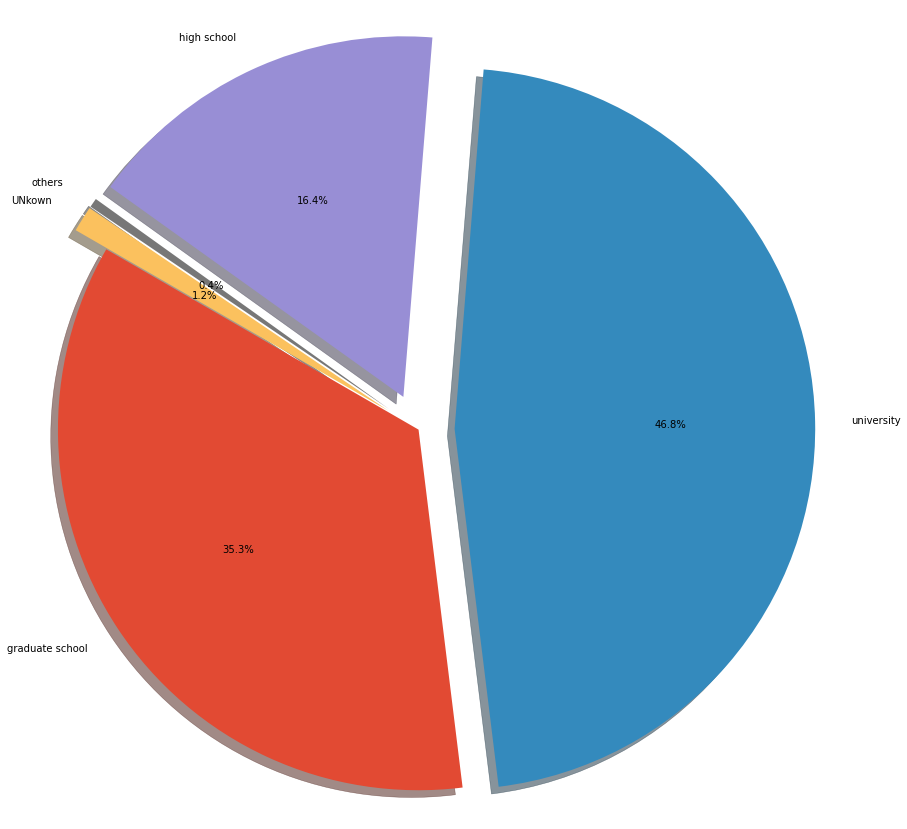

In [1440]:
counts_left=[10585,14030,4917,123,345]
department_left=['graduate school','university','high school','others','UNkown']
explode=[0,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(counts_left, explode=explode,labels=department_left, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  
plt.show()

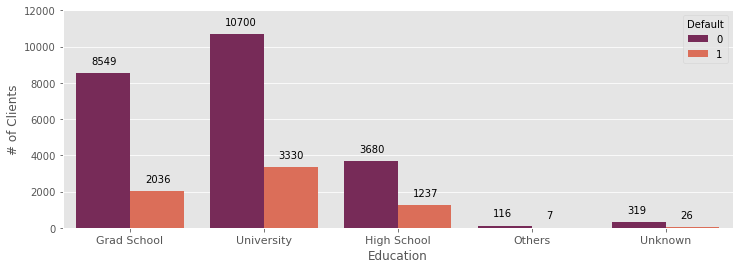

In [1441]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

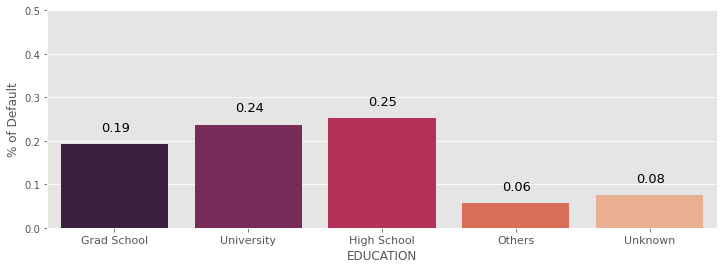

In [1442]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

The predominant level of education in our dataset is 'University', followed by 'Grad School', 'High School', 'Unknown' and 'Others'.

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability.

## Sex + Education/Marital Status


In [1443]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)


MARRIAGE  SEX  Default
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: Default, dtype: float64

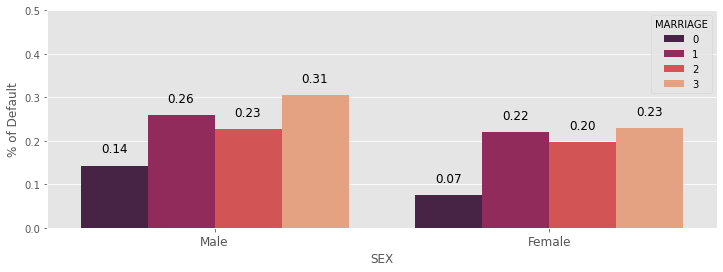

In [1444]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [1445]:
df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)


EDUCATION  SEX  Default
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.904762
                1          0.095238
           2    0          0.962963
                1          0.037037
5          1    0          0.921875
                1          0.078125
           2    0          0.926267
                1          0.073733
Name: Default, dtype: float64

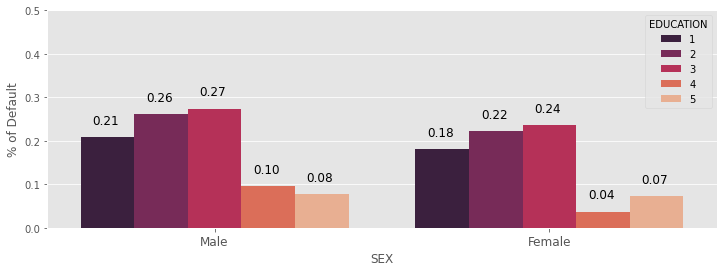

In [1446]:

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

In every single comparison, the probability of default was higher for men.



## Amount of Given Credit (LIMIT_BAL)


C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


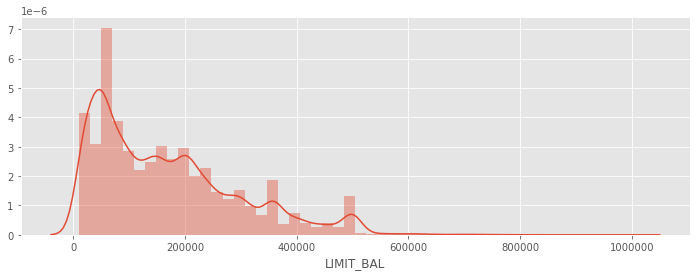

In [1447]:
plt.figure(figsize=(12,4))

sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

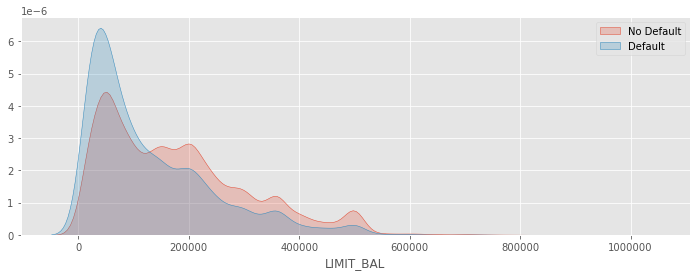

In [1448]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

In [1449]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


In [1450]:
df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: Default, dtype: float64

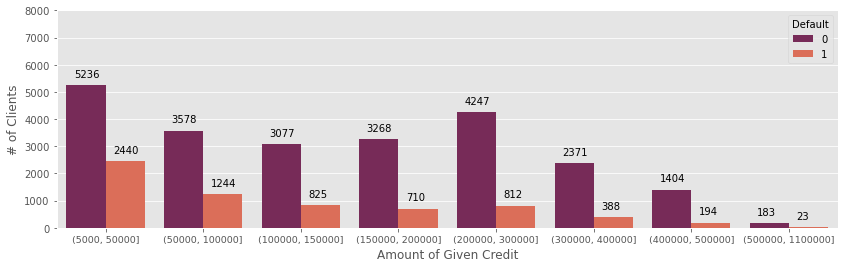

In [1451]:
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="Default", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

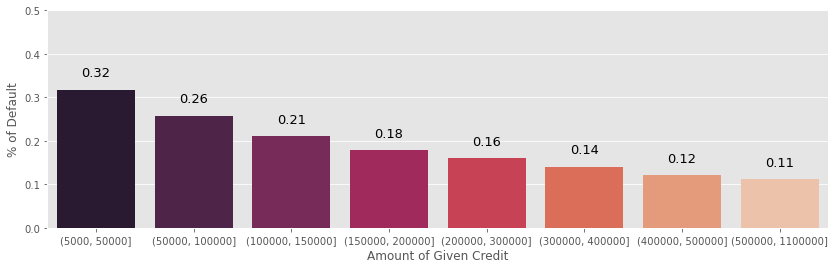

In [1452]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "Default", data = df, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Now it's pretty clear that there is a significant rate of default (over 30%) from customers with 50k or less of credit limit. We also can see that the higher the limit, the lower is the chance of defaulting.

## Amount of Given Credit (LIMIT_BAL) + Demographic Features

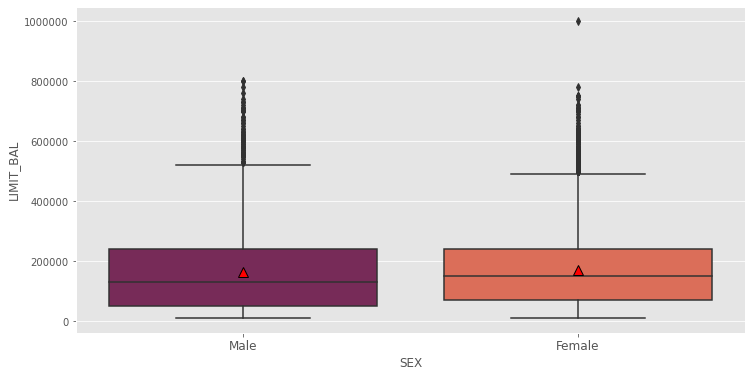

In [1453]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [1454]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

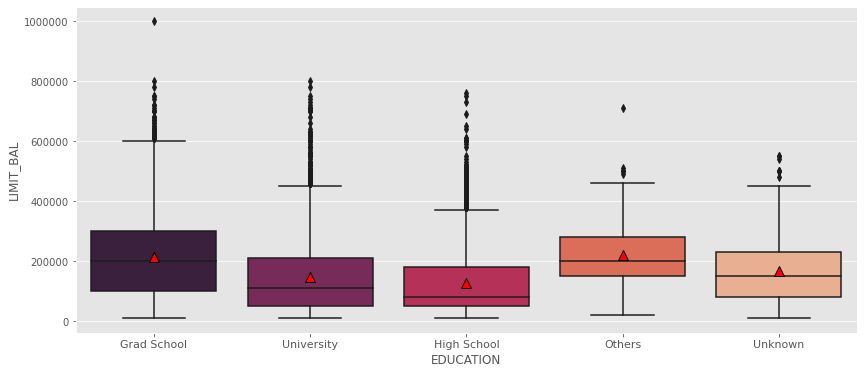

In [1455]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

In [1456]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()


MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

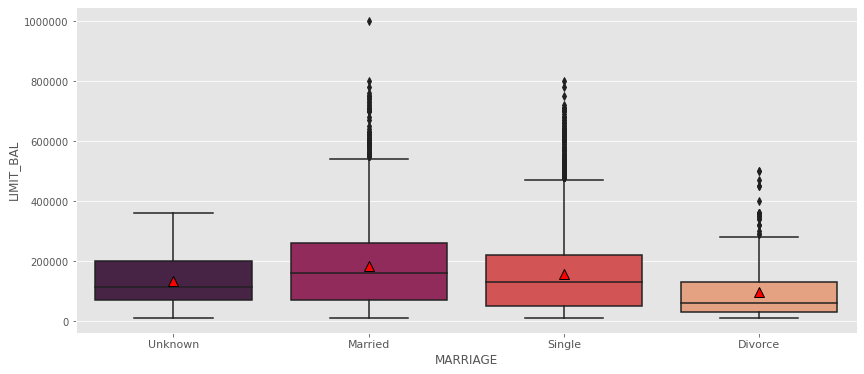

In [1457]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

In [1458]:
df.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

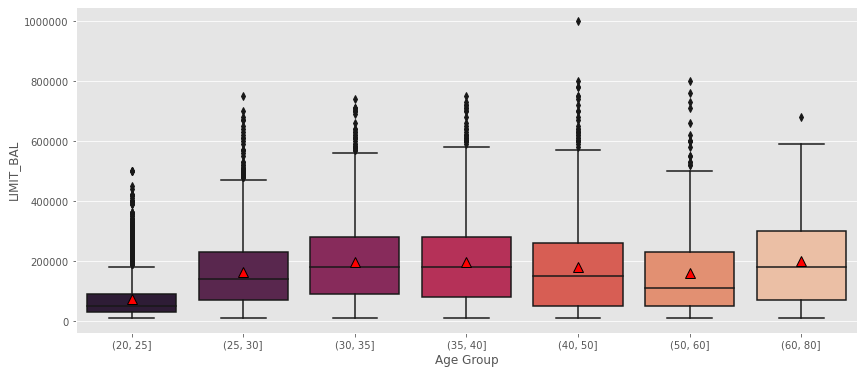

In [1459]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()


Overall, the offered credit limit seems to match the ability to pay in time within each category. The exceptions are the unknown categories, which have lower chances of default, but do not lead in the amount of given credit, and the age group of 60+, which, despite having one of the highest chances of default, receives, on average, the highest credit value.by age group.

We could analyze the relationship between the credit limit and the combination of two demographic features to see if we can find something different. In this notebook, I’ll only plot the ‘sex’ feature combined with the remaining demographic features.

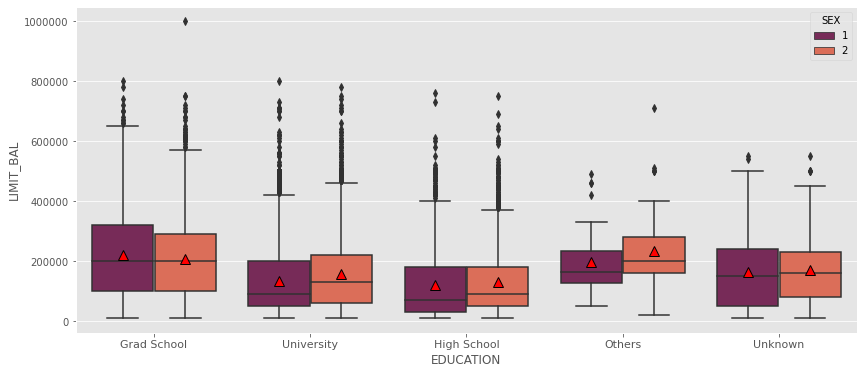

In [1460]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

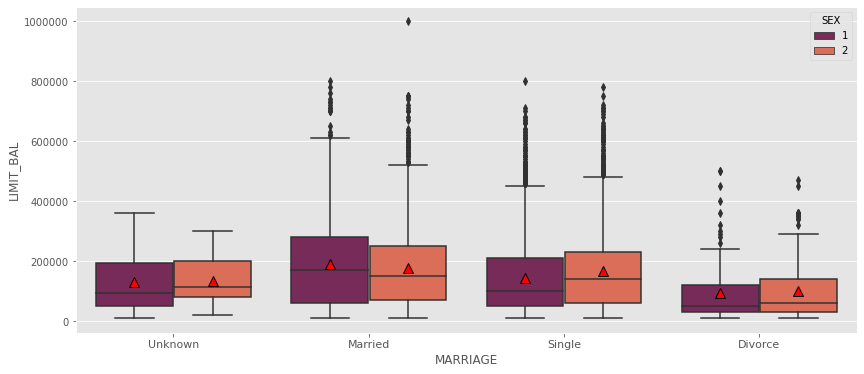

In [1461]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

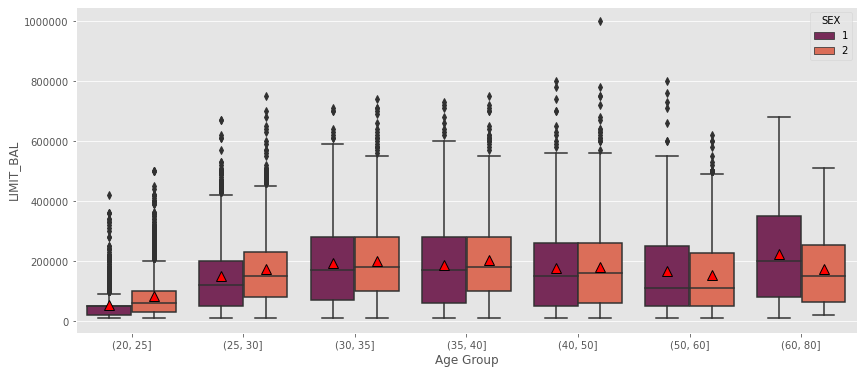

In [1462]:

plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

We saw earlier that the average given credit for women was slightly higher than for men. That still holds up for several combinations of categories, except among customers that:

Have a grad school diploma;
Are married;
Are 50+ years old.

## Repayment Status (PAY_X)


C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ilyes\anaconda3\lib\si

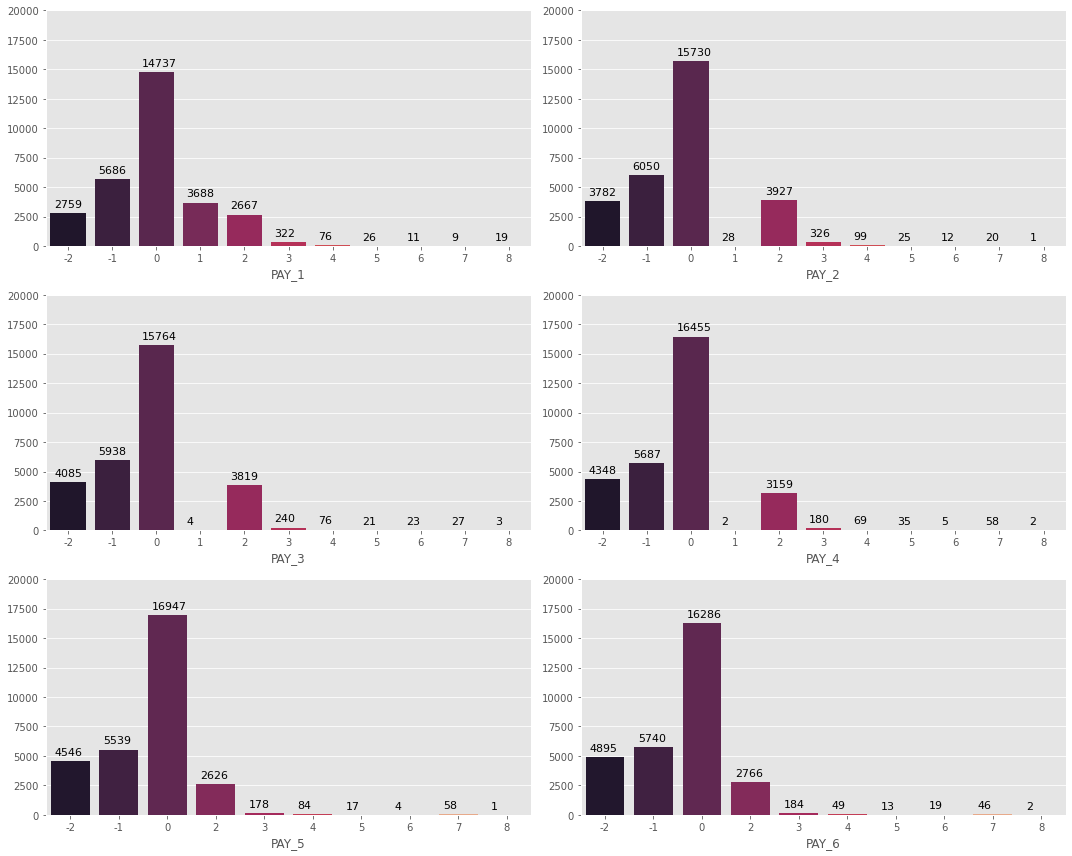

In [1463]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

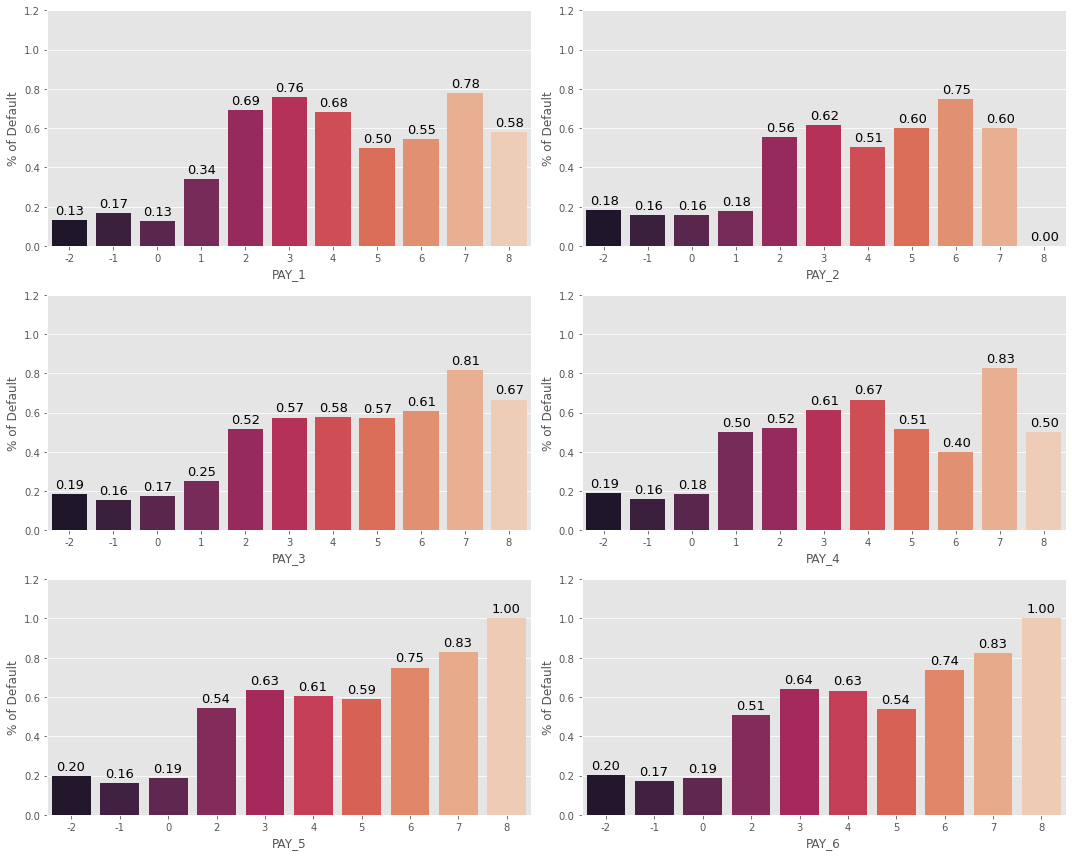

In [1464]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Most customers are duly paying their credit card bills. And it's pretty clear that their likelihood of default are much lower than the rest.

Since there are only a few customers with 4+ months of delay in all PAY_X features, we could make a new analysis with them all together just to have the average default of a more significant group.

In [1465]:
df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

In [1466]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

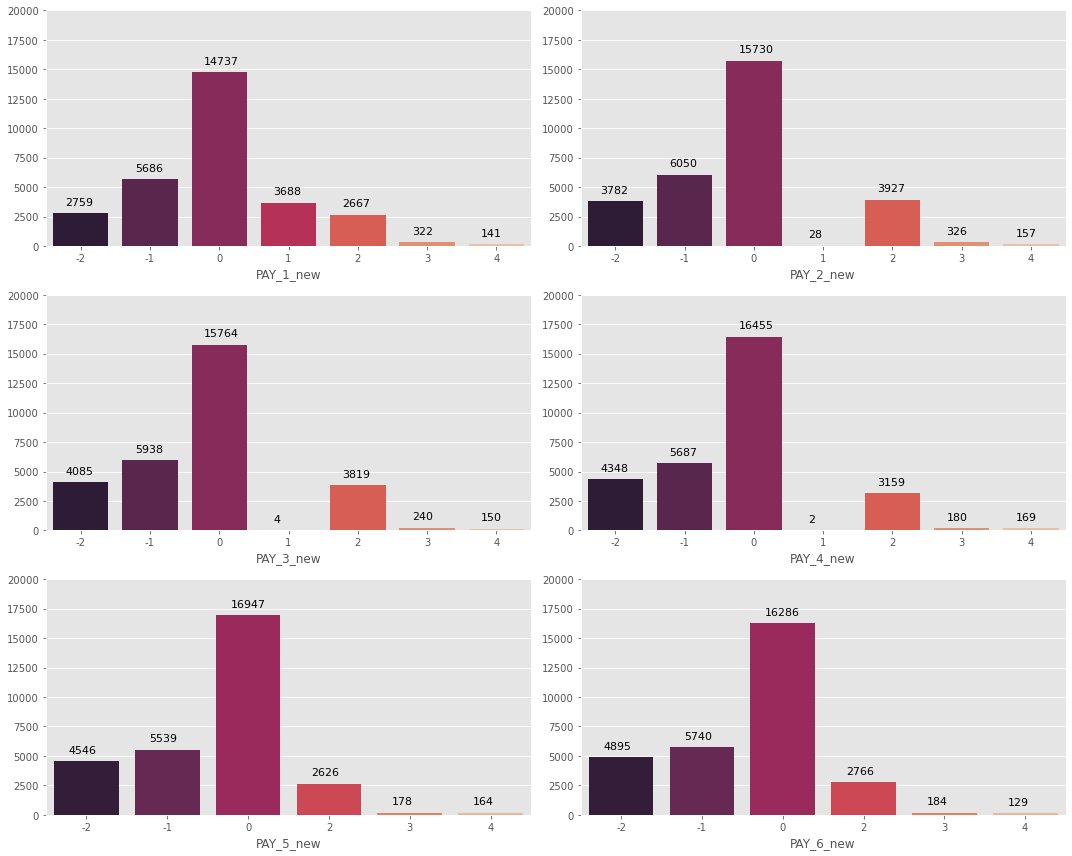

In [1467]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

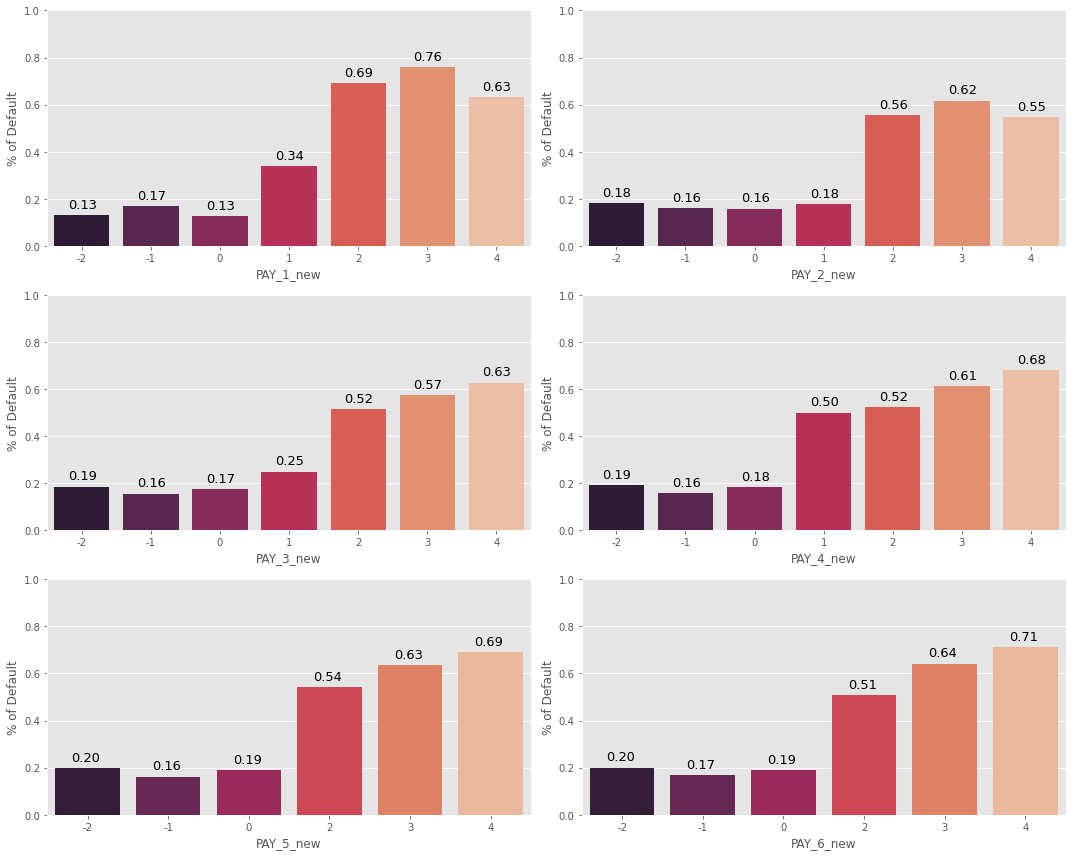

In [1468]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

plt.show()

## Amount of Bill Statement (BILL_AMTX)

C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

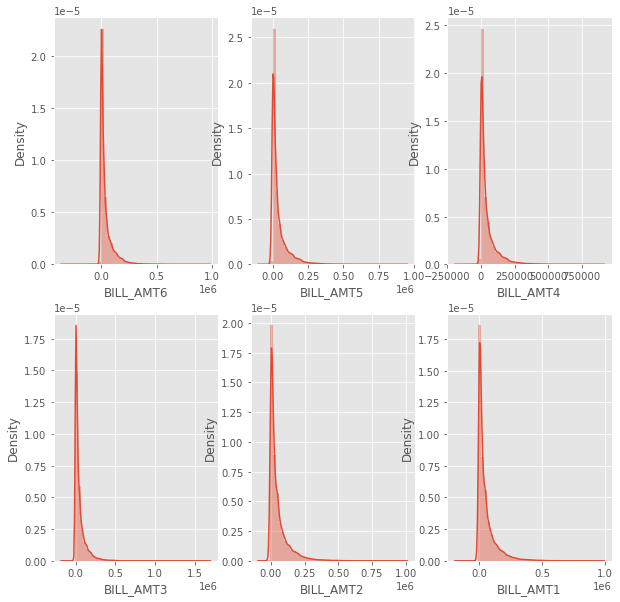

In [1469]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['BILL_AMT6'], ax = ax[0,0]) 
sns.distplot(df['BILL_AMT5'], ax = ax[0,1]) 
sns.distplot(df['BILL_AMT4'], ax = ax[0,2]) 
sns.distplot(df['BILL_AMT3'], ax = ax[1,0]) 
sns.distplot(df['BILL_AMT2'], ax = ax[1,1]) 
sns.distplot(df['BILL_AMT1'], ax = ax[1,2])
 
plt.show()

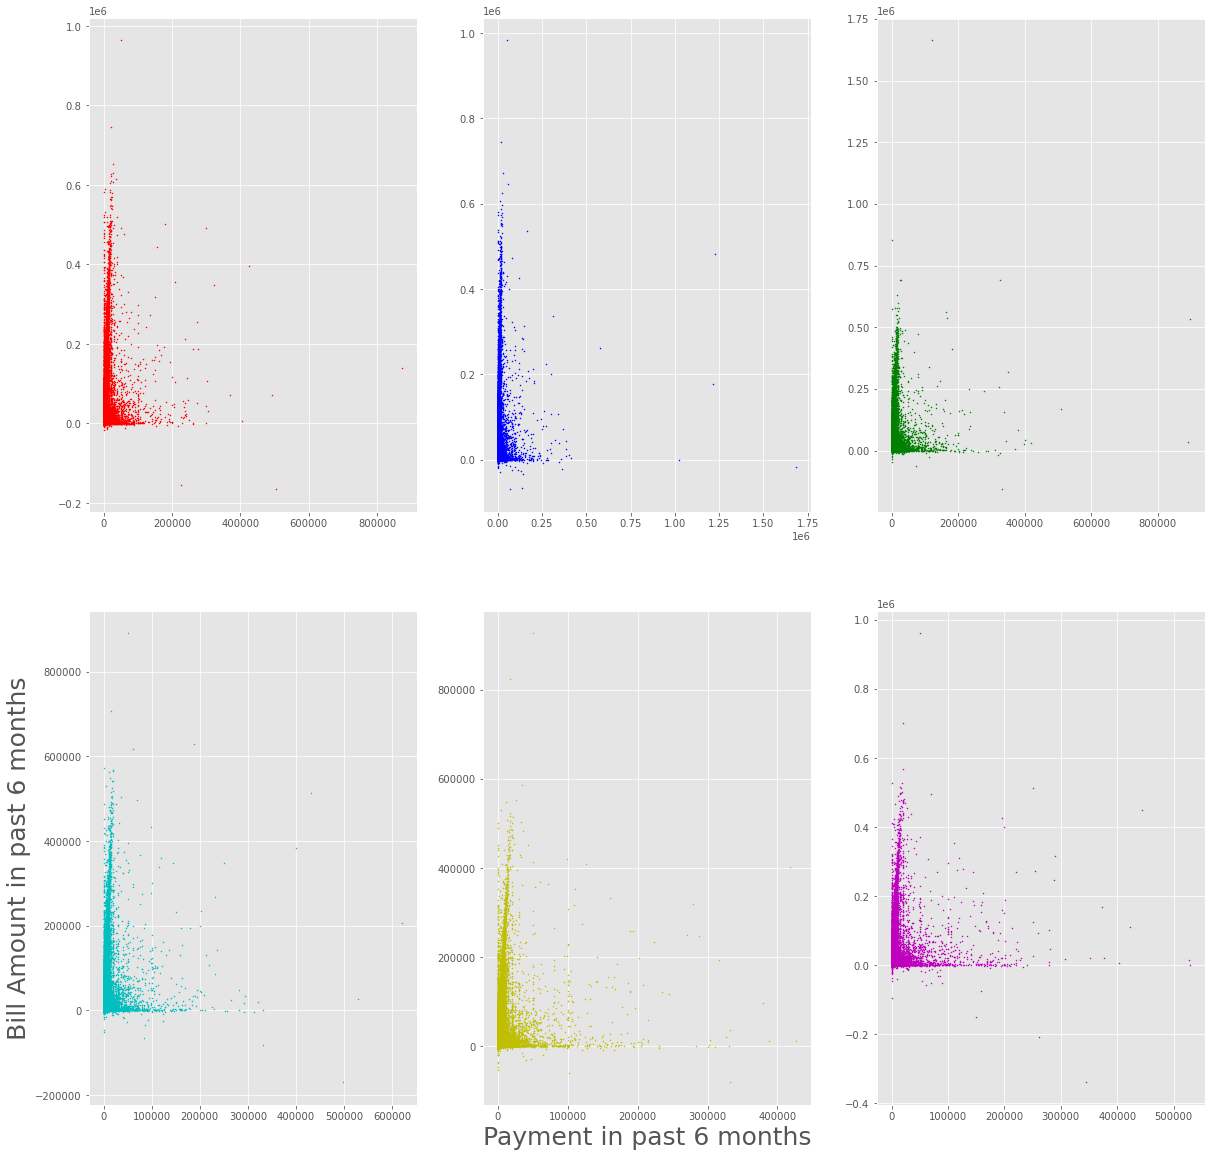

In [1470]:
plt.subplots(figsize=(20,20))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

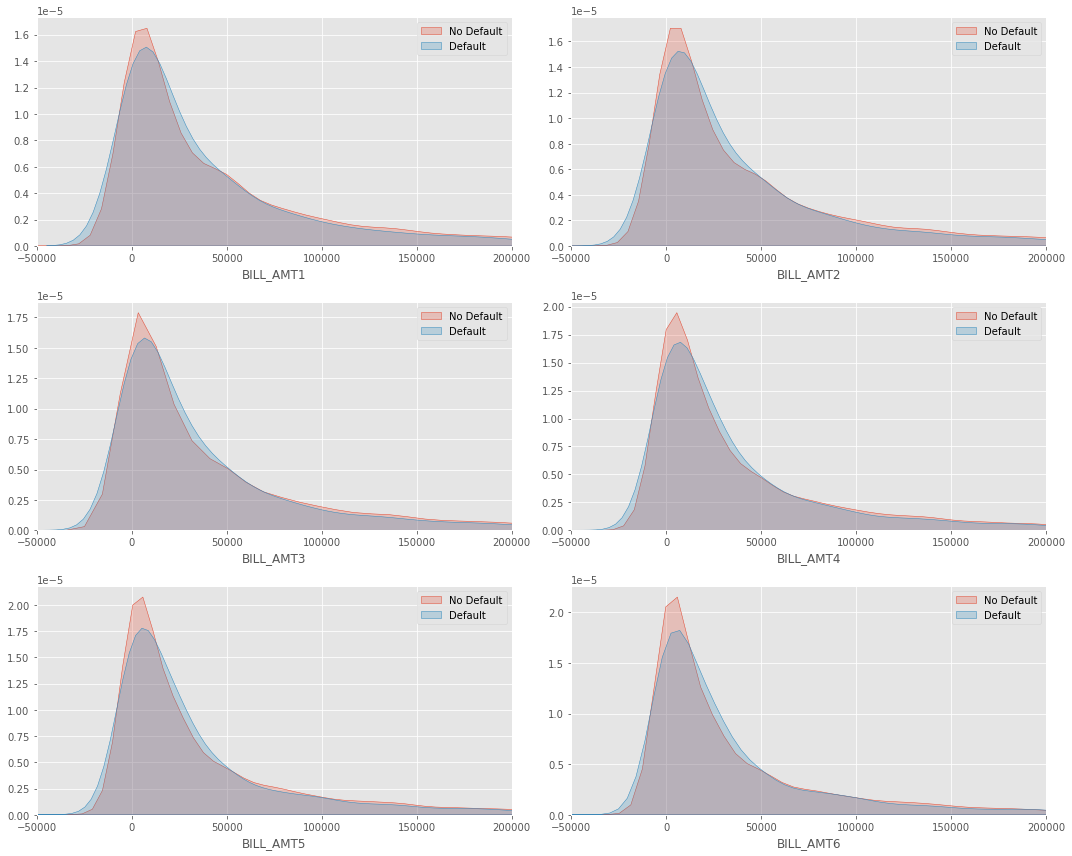

In [1471]:

bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [1472]:
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [1473]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

In [1474]:
for col in bill_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

BILL_AMT1_bin      Default
(-350000, -1]      0          0.815254
                   1          0.184746
(-1, 0]            0          0.734064
                   1          0.265936
(0, 25000]         0          0.774470
                   1          0.225530
(25000, 75000]     0          0.775209
                   1          0.224791
(75000, 200000]    0          0.802396
                   1          0.197604
(200000, 2000000]  0          0.797111
                   1          0.202889
Name: Default, dtype: float64
BILL_AMT2_bin      Default
(-350000, -1]      0          0.810164
                   1          0.189836
(-1, 0]            0          0.753791
                   1          0.246209
(0, 25000]         0          0.775836
                   1          0.224164
(25000, 75000]     0          0.773531
                   1          0.226469
(75000, 200000]    0          0.799176
                   1          0.200824
(200000, 2000000]  0          0.790230
                   

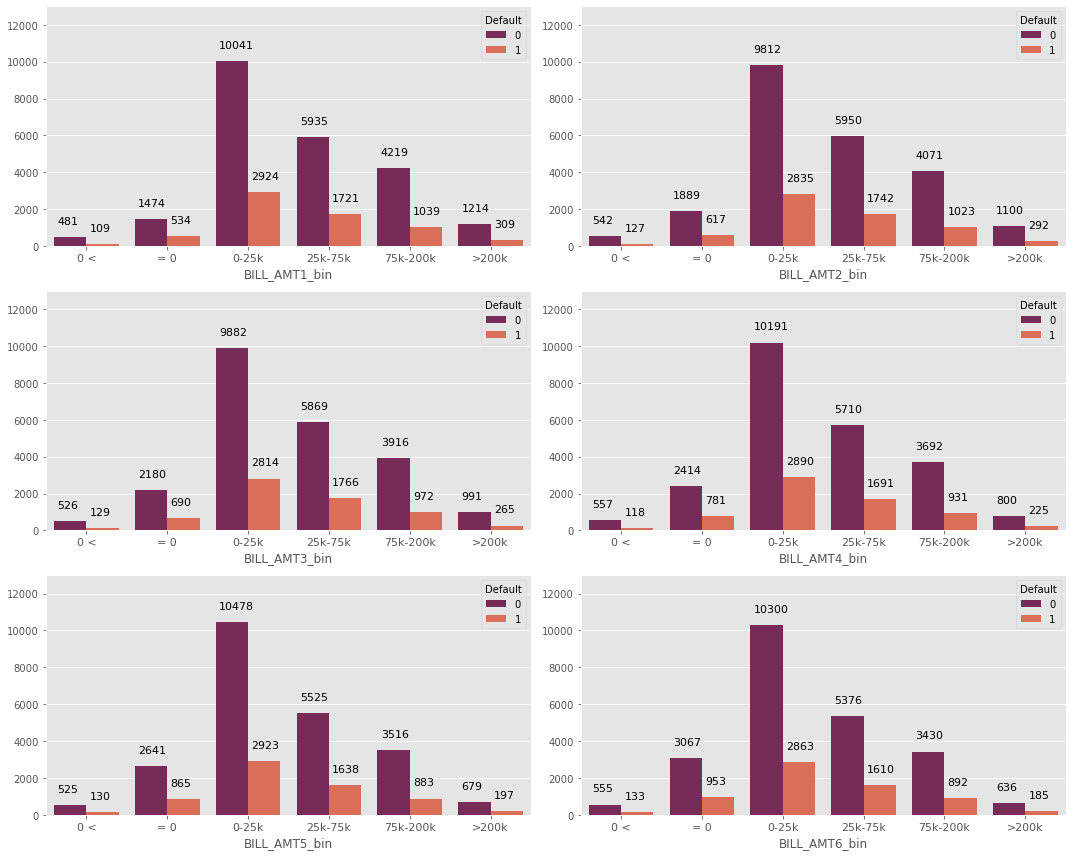

In [1475]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

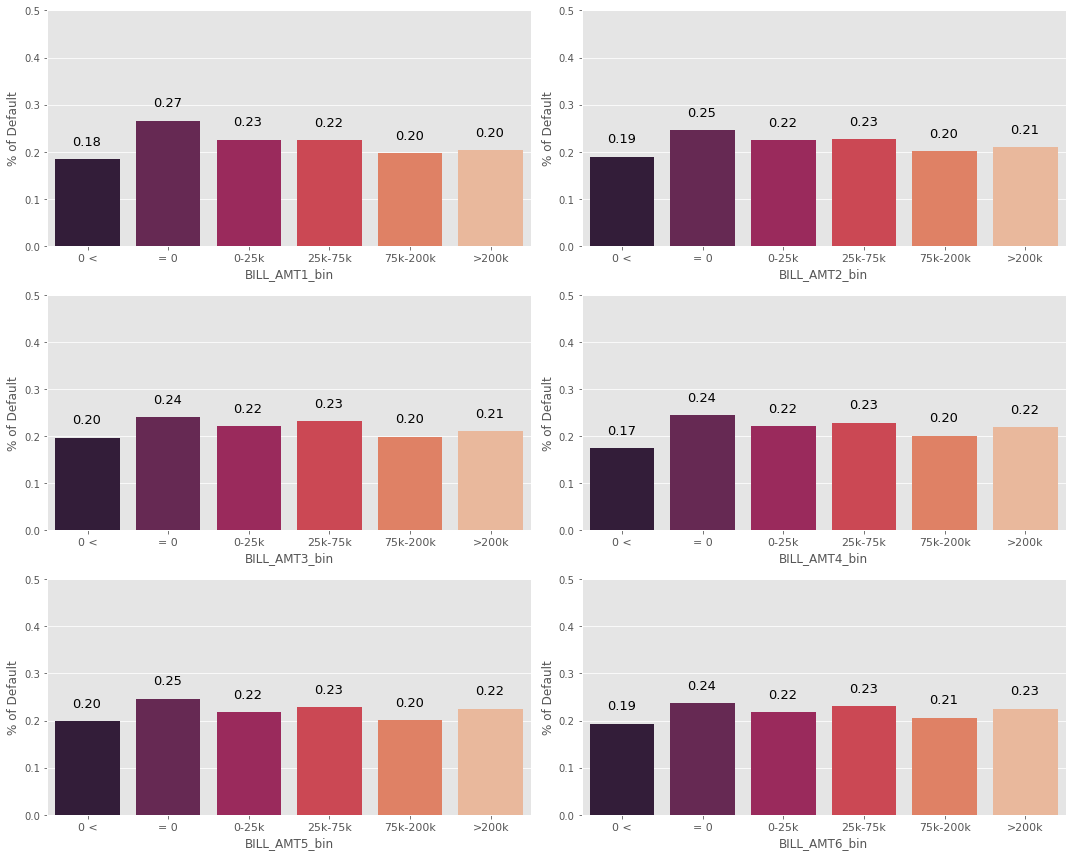

In [1476]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

## Amount of Previous Payment (PAY_AMTX)

C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilyes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

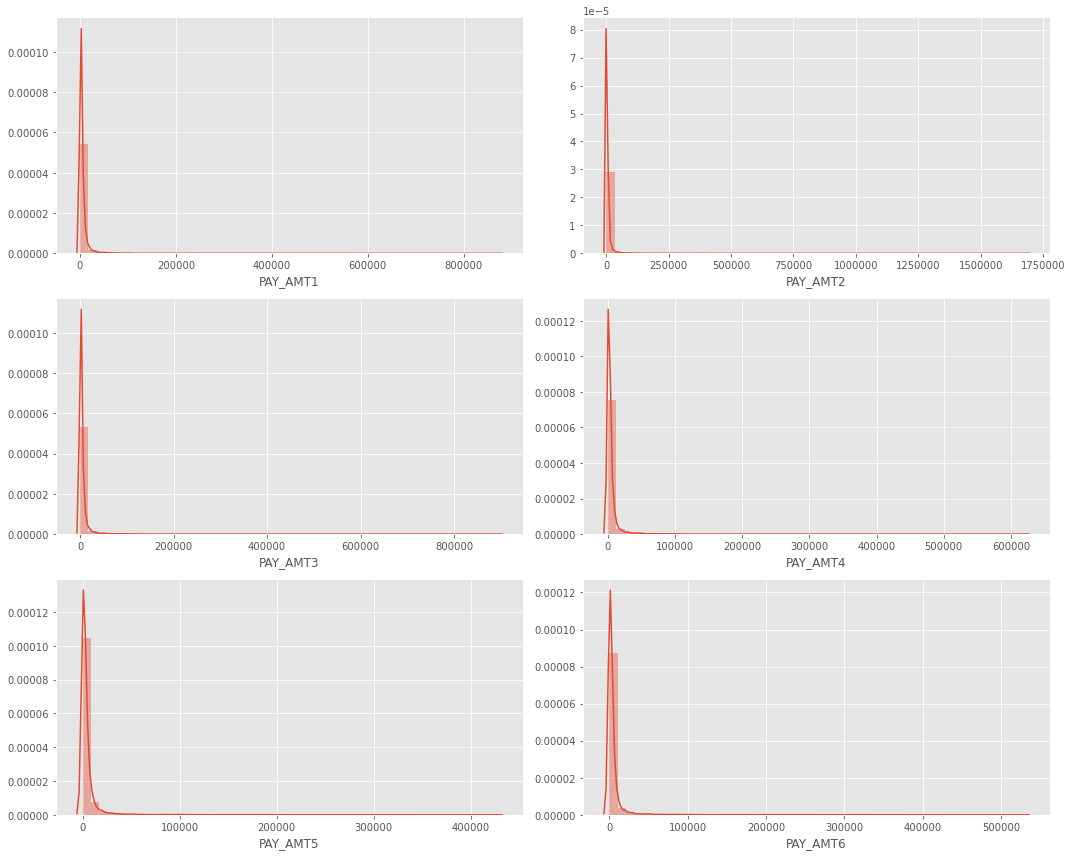

In [1477]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

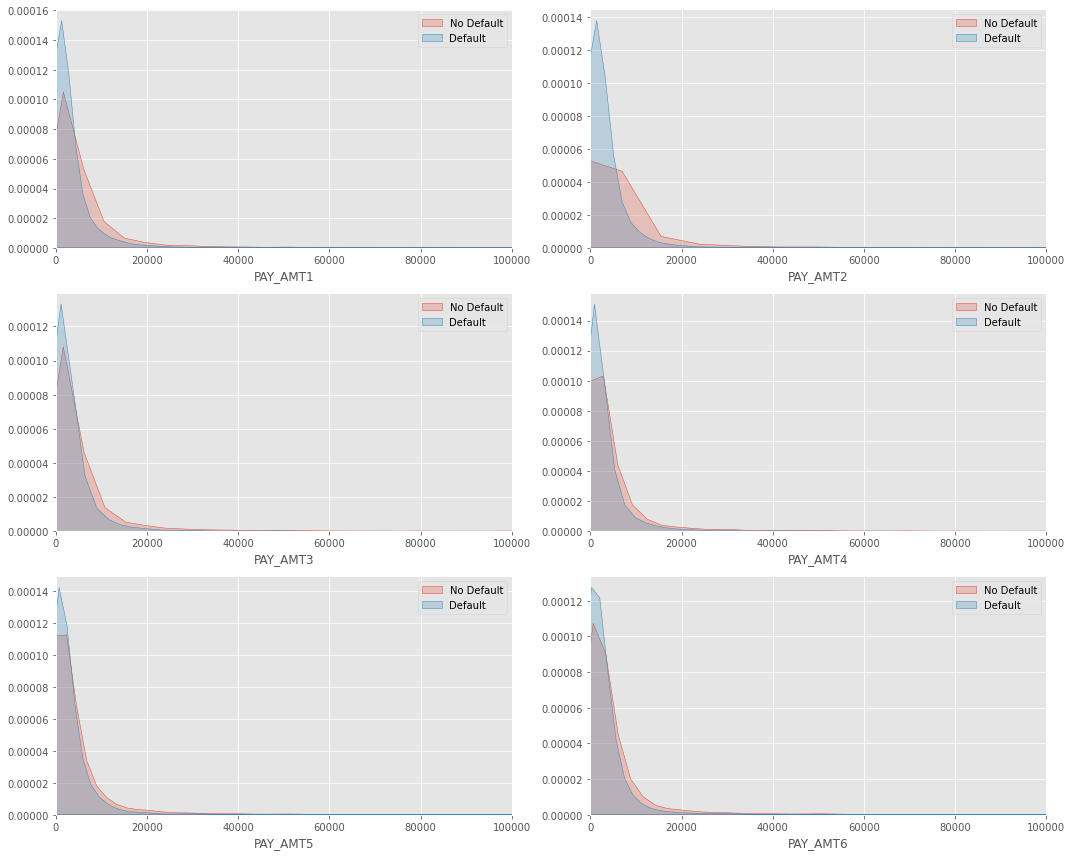

In [1478]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [1479]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [1480]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

In [1481]:
for col in pay_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

PAY_AMT1_bin       Default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: Default, dtype: float64
PAY_AMT2_bin       Default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: Default, dtype: float64
PAY_AMT3_bin       Default
(-1, 0]            0          0.676441
                   1          0.323559
(

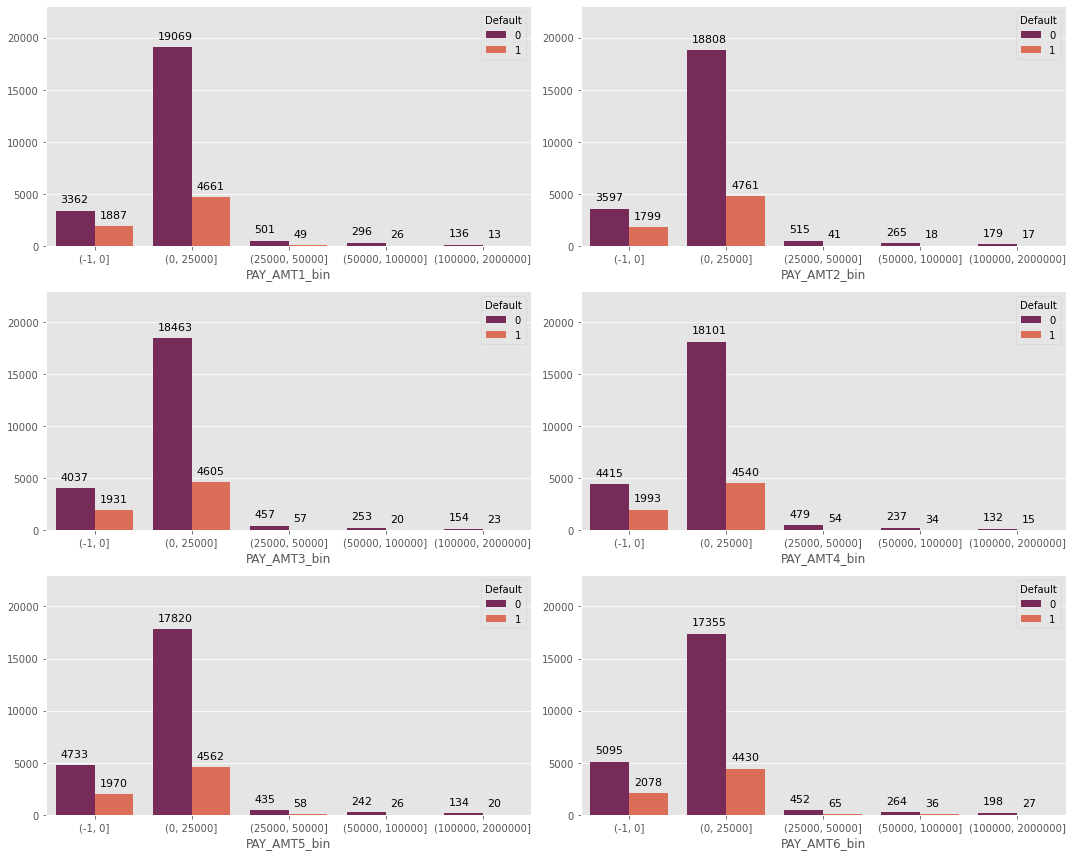

In [1482]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

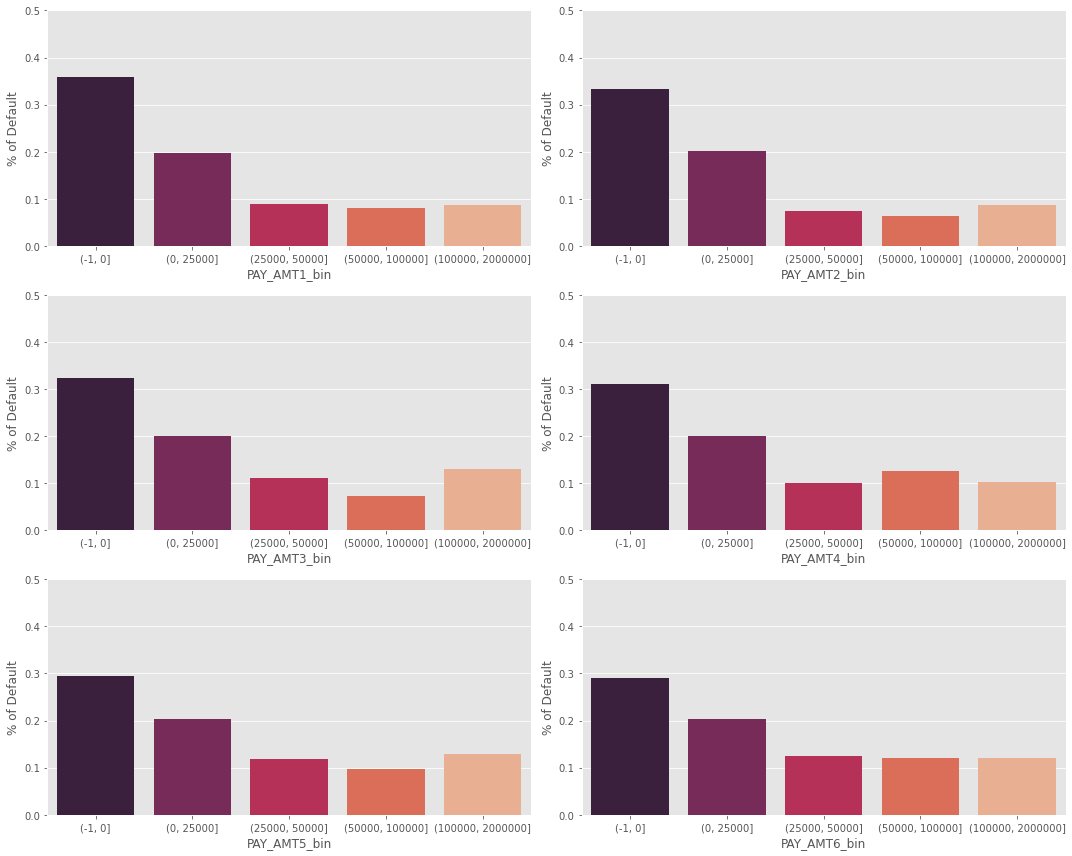

In [1483]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()

In [1484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  float64 
 2   SEX            30000 non-null  int64   
 3   EDUCATION      30000 non-null  int64   
 4   MARRIAGE       30000 non-null  int64   
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  int64   
 7   PAY_2          30000 non-null  int64   
 8   PAY_3          30000 non-null  int64   
 9   PAY_4          30000 non-null  int64   
 10  PAY_5          30000 non-null  int64   
 11  PAY_6          30000 non-null  int64   
 12  BILL_AMT1      30000 non-null  float64 
 13  BILL_AMT2      30000 non-null  float64 
 14  BILL_AMT3      30000 non-null  float64 
 15  BILL_AMT4      30000 non-null  float64 
 16  BILL_AMT5      30000 non-null  float64 
 17  BILL_AMT6      30000 non-null  

# Modeling

In [1485]:
df.shape

(30000, 45)

In [1486]:
X = df.copy().drop('Default', axis = 1)
Y = df['Default']

In [1487]:
X_base = X.copy().drop(pay_x_new, axis = 1)
X_base = X_base.drop(bill_amtx_bins, axis = 1)
X_base = X_base.drop(pay_amtx_bins, axis = 1)
X_base = X_base.drop(['AgeBin', 'LimitBin'], axis = 1)
X_base.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0       0.0  
1    1000.0    1000.0       0.0    2000.0  
2    1000.0    1000.0    1000.0    5000.0  
3    1200.0    1100.0    1069.0    1000.0  
4   10000.0    9000.0     689.0     679.0  

[5 rows x 24 columns]

### SPLIT DATA

In [1488]:
X_base_train, X_base_test, Y_train, Y_test = train_test_split(X_base, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

## RANDOM FOREST

In [1489]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_base_train, Y_train)
pred_rf = rf_model.predict(X_base_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf))

Test Accuracy:  0.8105


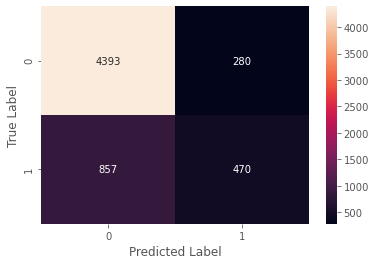

In [1490]:
rf_confusion_matrix = metrics.confusion_matrix(Y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [1491]:
print(metrics.classification_report(Y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



ROC_AUC:  0.7585600132622252


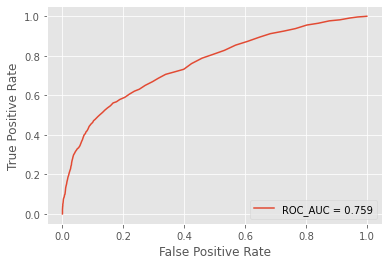

In [1492]:
rf_pred_proba = rf_model.predict_proba(X_base_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

### CATBOOST

In [1493]:
categorical_ft_base = ['SEX', 'EDUCATION', 'MARRIAGE']

cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_base)
cat_model.fit(X_base_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_base_test,Y_test)], cat_features = categorical_ft_base)
pred_cat = cat_model.predict(X_base_test)

Learning rate set to 0.069474
0:	test: 0.7521430	best: 0.7521430 (0)	total: 40.7ms	remaining: 40.6s
1:	test: 0.7574065	best: 0.7574065 (1)	total: 75.5ms	remaining: 37.7s
2:	test: 0.7600818	best: 0.7600818 (2)	total: 108ms	remaining: 35.7s
3:	test: 0.7615838	best: 0.7615838 (3)	total: 144ms	remaining: 35.8s
4:	test: 0.7649187	best: 0.7649187 (4)	total: 211ms	remaining: 42s
5:	test: 0.7632905	best: 0.7649187 (4)	total: 251ms	remaining: 41.7s
6:	test: 0.7637895	best: 0.7649187 (4)	total: 289ms	remaining: 41s
7:	test: 0.7631296	best: 0.7649187 (4)	total: 325ms	remaining: 40.3s
8:	test: 0.7641197	best: 0.7649187 (4)	total: 362ms	remaining: 39.8s
9:	test: 0.7640774	best: 0.7649187 (4)	total: 394ms	remaining: 39s
10:	test: 0.7659763	best: 0.7659763 (10)	total: 436ms	remaining: 39.2s
11:	test: 0.7658850	best: 0.7659763 (10)	total: 473ms	remaining: 38.9s
12:	test: 0.7653735	best: 0.7659763 (10)	total: 506ms	remaining: 38.4s
13:	test: 0.7650978	best: 0.7659763 (10)	total: 543ms	remaining: 38.3s


119:	test: 0.7792602	best: 0.7793492 (112)	total: 4.65s	remaining: 34.1s
120:	test: 0.7793617	best: 0.7793617 (120)	total: 4.68s	remaining: 34s
121:	test: 0.7793575	best: 0.7793617 (120)	total: 4.72s	remaining: 34s
122:	test: 0.7794200	best: 0.7794200 (122)	total: 4.76s	remaining: 33.9s
123:	test: 0.7793910	best: 0.7794200 (122)	total: 4.79s	remaining: 33.9s
124:	test: 0.7791939	best: 0.7794200 (122)	total: 4.83s	remaining: 33.8s
125:	test: 0.7792327	best: 0.7794200 (122)	total: 4.87s	remaining: 33.8s
126:	test: 0.7794802	best: 0.7794802 (126)	total: 4.92s	remaining: 33.8s
127:	test: 0.7793649	best: 0.7794802 (126)	total: 4.95s	remaining: 33.7s
128:	test: 0.7795279	best: 0.7795279 (128)	total: 4.99s	remaining: 33.7s
129:	test: 0.7796694	best: 0.7796694 (129)	total: 5.02s	remaining: 33.6s
130:	test: 0.7797290	best: 0.7797290 (130)	total: 5.05s	remaining: 33.5s
131:	test: 0.7797988	best: 0.7797988 (131)	total: 5.09s	remaining: 33.5s
132:	test: 0.7797203	best: 0.7797988 (131)	total: 5.13s

233:	test: 0.7794813	best: 0.7809770 (170)	total: 8.9s	remaining: 29.1s
234:	test: 0.7795424	best: 0.7809770 (170)	total: 8.94s	remaining: 29.1s
235:	test: 0.7796211	best: 0.7809770 (170)	total: 8.97s	remaining: 29.1s
236:	test: 0.7795470	best: 0.7809770 (170)	total: 9.01s	remaining: 29s
237:	test: 0.7795619	best: 0.7809770 (170)	total: 9.04s	remaining: 29s
238:	test: 0.7795571	best: 0.7809770 (170)	total: 9.09s	remaining: 28.9s
239:	test: 0.7795452	best: 0.7809770 (170)	total: 9.14s	remaining: 28.9s
240:	test: 0.7796964	best: 0.7809770 (170)	total: 9.18s	remaining: 28.9s
241:	test: 0.7796234	best: 0.7809770 (170)	total: 9.21s	remaining: 28.9s
242:	test: 0.7795919	best: 0.7809770 (170)	total: 9.25s	remaining: 28.8s
243:	test: 0.7795316	best: 0.7809770 (170)	total: 9.29s	remaining: 28.8s
244:	test: 0.7795757	best: 0.7809770 (170)	total: 9.33s	remaining: 28.8s
245:	test: 0.7797439	best: 0.7809770 (170)	total: 9.38s	remaining: 28.7s
246:	test: 0.7797198	best: 0.7809770 (170)	total: 9.42s	

In [1494]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat))

Test Accuracy:  0.8181666666666667


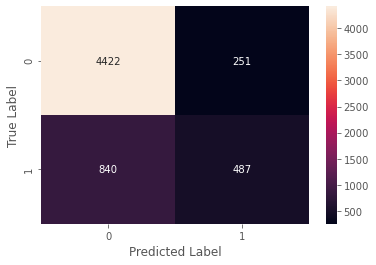

In [1495]:

cat_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [1496]:
print(metrics.classification_report(Y_test, pred_cat, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



ROC_AUC:  0.7809770280004857


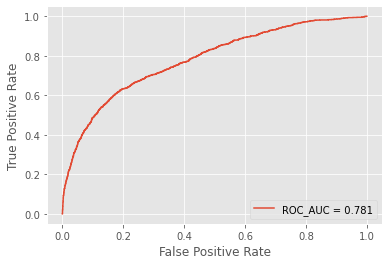

In [1497]:
cat_pred_proba = cat_model.predict_proba(X_base_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(Y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(Y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Catboost (with Added Features

In [1498]:
X_new = X.copy().drop(pay_x_new, axis = 1)
X_new = X_new.drop(bill_amtx_bins, axis = 1)
X_new = X_new.drop(['AgeBin', 'LimitBin'], axis = 1)

X_new.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  PAY_AMT1_bin    PAY_AMT2_bin  \
0  ...       0.0       0.0       0.0       0.0       (-1, 0]      (0, 25000]   
1  ...    1000.0    1000.0       0.0    2000.0       (-1, 0]      (0, 25000]   
2  ...    1000.0    1000.0    1000.0    5000.0    (0, 25000]      (0, 25000]   
3  ...    1200.0    1100.0    1069.0    1000.0    (0, 25000]      (0, 25000]   
4  ...   10000.0    9000.0     689.0     679.0    (0, 25000]  (25000, 50000]   

   PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  PAY_AMT6_bin  
0       (-1, 0]       (-1, 0]       (-1, 0]       (-1, 0]  
1    (0, 25000]    (0, 25000]       (-1, 0]    (0, 25000]  
2    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  
3    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  
4    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  

[5 rows x 30 columns]

In [1499]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            30000 non-null  int64   
 1   LIMIT_BAL     30000 non-null  float64 
 2   SEX           30000 non-null  int64   
 3   EDUCATION     30000 non-null  int64   
 4   MARRIAGE      30000 non-null  int64   
 5   AGE           30000 non-null  int64   
 6   PAY_1         30000 non-null  int64   
 7   PAY_2         30000 non-null  int64   
 8   PAY_3         30000 non-null  int64   
 9   PAY_4         30000 non-null  int64   
 10  PAY_5         30000 non-null  int64   
 11  PAY_6         30000 non-null  int64   
 12  BILL_AMT1     30000 non-null  float64 
 13  BILL_AMT2     30000 non-null  float64 
 14  BILL_AMT3     30000 non-null  float64 
 15  BILL_AMT4     30000 non-null  float64 
 16  BILL_AMT5     30000 non-null  float64 
 17  BILL_AMT6     30000 non-null  float64 
 18  PAY_AM

In [1500]:
le = LabelEncoder()

for col in pay_amtx_bins:
    X_new[col] = le.fit_transform(X_new[col])

In [1501]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

In [1502]:
categorical_ft_new = ['SEX', 'EDUCATION', 'MARRIAGE'
                      , 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

print(categorical_ft_new)

cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_new)
cat_model_new.fit(X_new_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_new_test,Y_test)], cat_features = categorical_ft_new)
pred_cat_new = cat_model_new.predict(X_new_test)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']
Learning rate set to 0.069474
0:	test: 0.7402673	best: 0.7402673 (0)	total: 49.7ms	remaining: 49.7s
1:	test: 0.7495957	best: 0.7495957 (1)	total: 100ms	remaining: 49.9s
2:	test: 0.7567045	best: 0.7567045 (2)	total: 164ms	remaining: 54.5s
3:	test: 0.7570599	best: 0.7570599 (3)	total: 211ms	remaining: 52.6s
4:	test: 0.7580779	best: 0.7580779 (4)	total: 262ms	remaining: 52.2s
5:	test: 0.7596098	best: 0.7596098 (5)	total: 308ms	remaining: 51.1s
6:	test: 0.7590753	best: 0.7596098 (5)	total: 357ms	remaining: 50.6s
7:	test: 0.7618281	best: 0.7618281 (7)	total: 408ms	remaining: 50.5s
8:	test: 0.7617616	best: 0.7618281 (7)	total: 468ms	remaining: 51.6s
9:	test: 0.7613552	best: 0.7618281 (7)	total: 491ms	remaining: 48.6s
10:	test: 0.7613790	best: 0.7618281 (7)	total: 535ms	remaining: 48.1s
11:	test: 0.7609656	best: 0.7618281 (7)	total: 582ms	remaining: 47.9s
12:	test: 

118:	test: 0.7782346	best: 0.7786592 (106)	total: 5.64s	remaining: 41.7s
119:	test: 0.7783391	best: 0.7786592 (106)	total: 5.69s	remaining: 41.7s
120:	test: 0.7782689	best: 0.7786592 (106)	total: 5.74s	remaining: 41.7s
121:	test: 0.7782878	best: 0.7786592 (106)	total: 5.79s	remaining: 41.7s
122:	test: 0.7782733	best: 0.7786592 (106)	total: 5.84s	remaining: 41.6s
123:	test: 0.7783191	best: 0.7786592 (106)	total: 5.89s	remaining: 41.6s
124:	test: 0.7784175	best: 0.7786592 (106)	total: 5.95s	remaining: 41.6s
125:	test: 0.7783630	best: 0.7786592 (106)	total: 5.99s	remaining: 41.6s
126:	test: 0.7783844	best: 0.7786592 (106)	total: 6.04s	remaining: 41.5s
127:	test: 0.7783888	best: 0.7786592 (106)	total: 6.08s	remaining: 41.5s
128:	test: 0.7783859	best: 0.7786592 (106)	total: 6.13s	remaining: 41.4s
129:	test: 0.7783797	best: 0.7786592 (106)	total: 6.17s	remaining: 41.3s
130:	test: 0.7783197	best: 0.7786592 (106)	total: 6.22s	remaining: 41.3s
131:	test: 0.7784260	best: 0.7786592 (106)	total: 6

234:	test: 0.7802809	best: 0.7803271 (233)	total: 11s	remaining: 35.8s
235:	test: 0.7802288	best: 0.7803271 (233)	total: 11.1s	remaining: 35.8s
236:	test: 0.7802788	best: 0.7803271 (233)	total: 11.1s	remaining: 35.8s
237:	test: 0.7803112	best: 0.7803271 (233)	total: 11.2s	remaining: 35.7s
238:	test: 0.7803666	best: 0.7803666 (238)	total: 11.2s	remaining: 35.7s
239:	test: 0.7802831	best: 0.7803666 (238)	total: 11.3s	remaining: 35.7s
240:	test: 0.7802409	best: 0.7803666 (238)	total: 11.3s	remaining: 35.6s
241:	test: 0.7802225	best: 0.7803666 (238)	total: 11.3s	remaining: 35.5s
242:	test: 0.7801602	best: 0.7803666 (238)	total: 11.4s	remaining: 35.5s
243:	test: 0.7801546	best: 0.7803666 (238)	total: 11.4s	remaining: 35.4s
244:	test: 0.7800451	best: 0.7803666 (238)	total: 11.5s	remaining: 35.4s
245:	test: 0.7801038	best: 0.7803666 (238)	total: 11.5s	remaining: 35.3s
246:	test: 0.7800981	best: 0.7803666 (238)	total: 11.6s	remaining: 35.3s
247:	test: 0.7800775	best: 0.7803666 (238)	total: 11.

349:	test: 0.7802541	best: 0.7808524 (333)	total: 16.5s	remaining: 30.6s
350:	test: 0.7800969	best: 0.7808524 (333)	total: 16.5s	remaining: 30.5s
351:	test: 0.7801436	best: 0.7808524 (333)	total: 16.6s	remaining: 30.5s
352:	test: 0.7801697	best: 0.7808524 (333)	total: 16.6s	remaining: 30.5s
353:	test: 0.7801488	best: 0.7808524 (333)	total: 16.7s	remaining: 30.4s
354:	test: 0.7801918	best: 0.7808524 (333)	total: 16.7s	remaining: 30.4s
355:	test: 0.7800740	best: 0.7808524 (333)	total: 16.8s	remaining: 30.3s
356:	test: 0.7799420	best: 0.7808524 (333)	total: 16.8s	remaining: 30.3s
357:	test: 0.7800380	best: 0.7808524 (333)	total: 16.9s	remaining: 30.2s
358:	test: 0.7799520	best: 0.7808524 (333)	total: 16.9s	remaining: 30.2s
359:	test: 0.7799888	best: 0.7808524 (333)	total: 16.9s	remaining: 30.1s
360:	test: 0.7801588	best: 0.7808524 (333)	total: 17s	remaining: 30.1s
361:	test: 0.7801101	best: 0.7808524 (333)	total: 17s	remaining: 30s
362:	test: 0.7799948	best: 0.7808524 (333)	total: 17.1s	r

In [1503]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat_new))

Test Accuracy:  0.8146666666666667


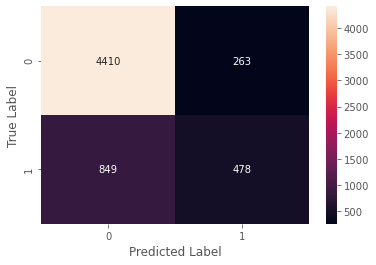

In [1504]:
cat_new_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [1505]:
print(metrics.classification_report(Y_test, pred_cat_new, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000



ROC_AUC:  0.78085237211443


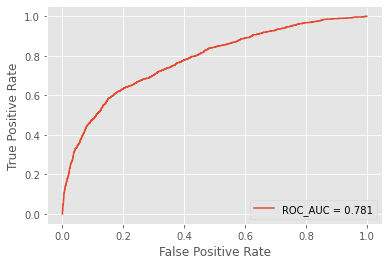

In [1506]:
cat_new_pred_proba = cat_model_new.predict_proba(X_new_test)[:,1]

cat_new_roc_auc = metrics.roc_auc_score(Y_test, cat_new_pred_proba)
print('ROC_AUC: ', cat_new_roc_auc)

cat_new_fpr, cat_new_tpr, thresholds = metrics.roc_curve(Y_test, cat_new_pred_proba)

plt.plot(cat_new_fpr,cat_new_tpr, label = 'ROC_AUC = %0.3f' % cat_new_roc_auc)
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [1507]:
pool = Pool(X_new_train, Y_train, cat_features=categorical_ft_new)

Feature_importance = pd.DataFrame({'feature_importance': cat_model_new.get_feature_importance(pool), 
                      'feature_names': X_new_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Feature_importance

feature_importance feature_names
6            15.841636         PAY_1
1             9.002081     LIMIT_BAL
12            8.199256     BILL_AMT1
0             4.786230            ID
19            4.205783      PAY_AMT2
5             3.910114           AGE
23            3.824671      PAY_AMT6
20            3.753998      PAY_AMT3
18            3.590637      PAY_AMT1
21            3.329365      PAY_AMT4
8             3.286484         PAY_3
17            3.234693     BILL_AMT6
13            3.080794     BILL_AMT2
7             2.954486         PAY_2
3             2.949275     EDUCATION
16            2.627944     BILL_AMT5
22            2.315922      PAY_AMT5
9             2.286337         PAY_4
14            2.253578     BILL_AMT3
15            2.232071     BILL_AMT4
10            2.087659         PAY_5
11            1.642681         PAY_6
24            1.401102  PAY_AMT1_bin
26            1.348735  PAY_AMT3_bin
2             1.326324           SEX
4             1.178025      MARRIAGE
29            1.162051  PAY_AMT6_bin
28            1.062374  PAY_AMT5_bin
27            0.730146  PAY_AMT4_bin
25            0.395546  PAY_AMT2_bin

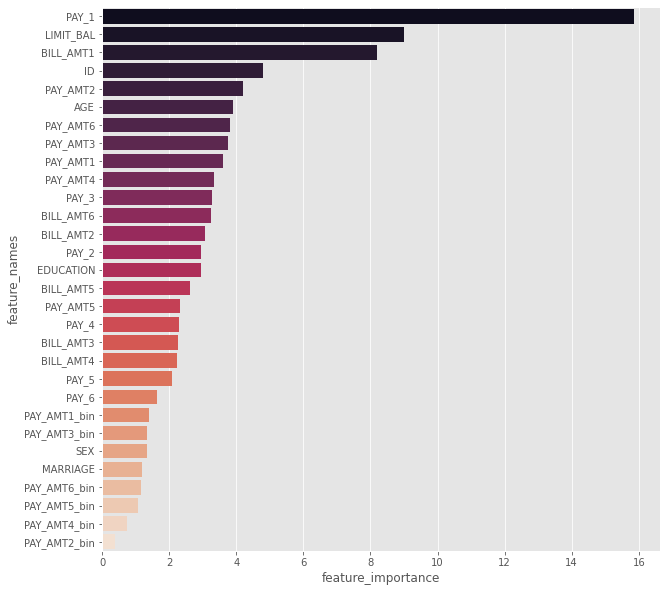

In [1508]:
plt.figure(figsize=(10,10))

sns.barplot(x=Feature_importance['feature_importance'], y=Feature_importance['feature_names'], palette = 'rocket')

plt.show()

##  XGBOOST

In [122]:
turnover = xgb.DMatrix(data=X_base,label=Y)

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [200],
'subsample': [0.3, 0.5, 0.9],"max_depth":[2,3,4,5],'colsample_bytree':[0.1,0.3,.0,8,0.9,0.15]}

gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(X_base, Y)
print("Best parameters found: ",grid_mse.best_params_)
print("best accuracy found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
[22:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\ilyes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ilyes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in

[23:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 27.9min finished


[23:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.3}
best accuracy found:  0.9037495189859902


In [1509]:
X_new_train.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
22788  22789   160000.0    2          2         2   33      2      2      3   
29006  29007   150000.0    2          1         2   34      1     -1     -1   
16950  16951    10000.0    1          2         1   50      1      2      0   
22280  22281   220000.0    2          1         2   29      0      0      0   
11346  11347   310000.0    2          1         2   32      1     -2     -1   

       PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  PAY_AMT1_bin  \
22788      2  ...       0.0    6100.0   12300.0    6100.0             1   
29006     -2  ...       0.0       0.0       0.0       0.0             1   
16950      0  ...    1134.0     294.0     305.0    1000.0             1   
22280      0  ...    7887.0    4800.0    4900.0    6000.0             1   
11346      0  ...       0.0       0.0       0.0    1200.0             0   

       PAY_AMT2_bin  PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  PAY_AMT6_bin  
22788             0             0             1             1             1  
29006             0             0             0             0             0  
16950             1             1             1             1             1  
22280             1             1             1             1             1  
11346             1             0             0             0             1  

[5 rows x 30 columns]

In [1510]:
X_new_train.drop('ID',axis=1)
X_new_test.drop('ID',axis=1)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
6907     50000.0    1          2         2   46     -1     -1     -1     -1   
24575   150000.0    1          1         1   31     -1     -1     -2     -2   
26766    50000.0    1          2         2   25      0      0      0      0   
2156    290000.0    2          1         2   25      0      0      0      0   
3179    500000.0    2          2         1   27     -2     -2     -2     -2   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
8836    150000.0    2          5         2   27     -2     -2     -1     -1   
1259     50000.0    1          1         2   24      2      2      0      0   
27309   220000.0    1          1         2   34      0      0     -1     -1   
29583   120000.0    1          1         2   26     -1     -1     -1     -2   
24399   200000.0    1          3         2   33     -2     -2     -2     -2   

       PAY_5  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  PAY_AMT1_bin  \
6907       0  ...    3472.0    2320.0    1764.0    2841.0             2   
24575     -2  ...       0.0       0.0   11694.0   30000.0             0   
26766      0  ...    2200.0    2000.0    1800.0    2038.0             1   
2156       0  ...   10000.0   15000.0    7844.0   23333.0             1   
3179      -2  ...   10000.0   10000.0   10000.0   25304.0             1   
...      ...  ...       ...       ...       ...       ...           ...   
8836       0  ...   20368.0      25.0   10363.0    4881.0             1   
1259       0  ...     693.0    1080.0     700.0    1004.0             0   
27309     -1  ...    9530.0  120000.0       0.0       0.0             1   
29583     -1  ...       0.0   10446.0       0.0       0.0             1   
24399     -1  ...    3978.0    5403.0       0.0       0.0             1   

       PAY_AMT2_bin  PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  PAY_AMT6_bin  
6907              0             1             1             1             1  
24575             0             0             0             1             2  
26766             1             1             1             1             1  
2156              1             1             1             1             1  
3179              1             1             1             1             2  
...             ...           ...           ...           ...           ...  
8836              3             1             1             1             1  
1259              1             1             1             1             1  
27309             1             1             4             0             0  
29583             0             0             1             0             0  
24399             1             1             1             0             0  

[6000 rows x 29 columns]

In [1511]:
reg_xgb = xgb.XGBClassifier(colsample_bytree= 1, learning_rate= 0.04, max_depth=5, n_estimators=200, subsample= 0.5,gamma=0.5)
reg_xgb.fit(X_new_train, Y_train)

pred_xgb = reg_xgb.predict(X_new_test)
print('xgb_accuracy: {:.3f}'.format(metrics.accuracy_score(Y_test, pred_xgb)))

C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_accuracy: 0.818


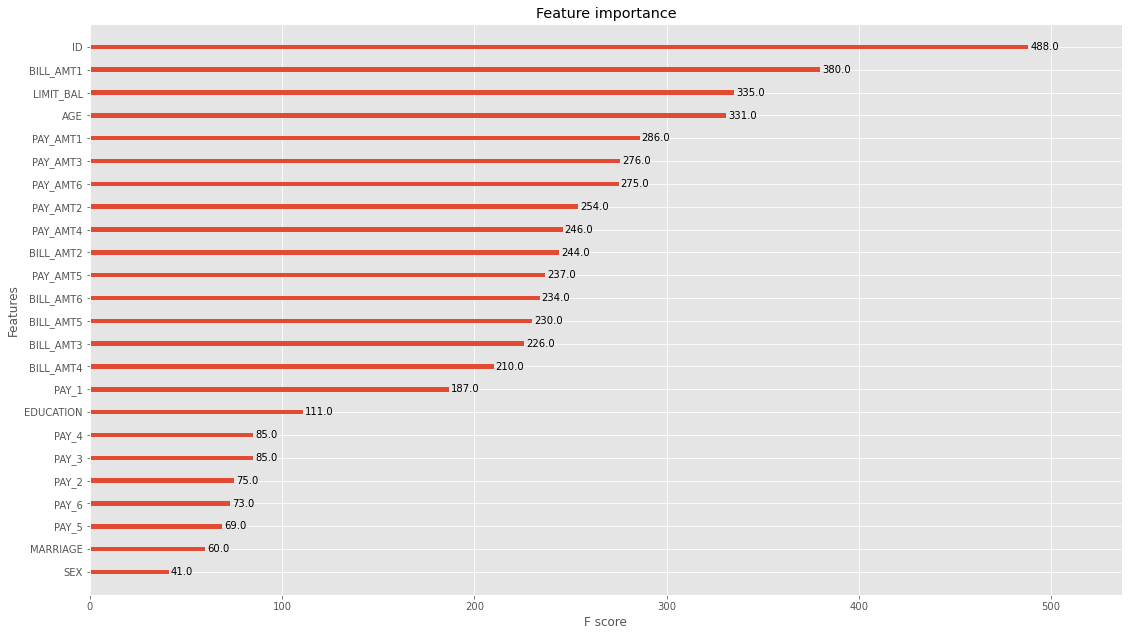

In [1512]:
xgb.plot_importance(reg_xgb)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [1513]:
X=df[['PAY_1','LIMIT_BAL','BILL_AMT1','PAY_AMT6','PAY_AMT2','PAY_AMT1','AGE','PAY_AMT3','PAY_AMT5','PAY_AMT4','BILL_AMT6','PAY_3','PAY_6']]
Y=df['Default']

In [1514]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

In [1515]:
reg_xgb = xgb.XGBClassifier(colsample_bytree= 1, learning_rate= 0.04, max_depth=5, n_estimators=200, subsample= 0.5)
reg_xgb.fit(X_train, Y_train)

pred_xgb = reg_xgb.predict(X_test)
print('xgb_accuracy: {:.3f}'.format(metrics.accuracy_score(Y_test, pred_xgb)))

C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_accuracy: 0.819


In [1516]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PAY_1      30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   BILL_AMT1  30000 non-null  float64
 3   PAY_AMT6   30000 non-null  float64
 4   PAY_AMT2   30000 non-null  float64
 5   PAY_AMT1   30000 non-null  float64
 6   AGE        30000 non-null  int64  
 7   PAY_AMT3   30000 non-null  float64
 8   PAY_AMT5   30000 non-null  float64
 9   PAY_AMT4   30000 non-null  float64
 10  BILL_AMT6  30000 non-null  float64
 11  PAY_3      30000 non-null  int64  
 12  PAY_6      30000 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.0 MB


### Voiting

In [1517]:
for i in range(2,100):
    classifierr = KNeighborsClassifier(n_neighbors=i)
    classifierr.fit(X_new_train, Y_train)
    print(i)
    print ('accuracy = { :.3f}',format(classifierr.score(X_new_test,Y_test)))

2
accuracy = { :.3f} 0.7656666666666667
3
accuracy = { :.3f} 0.7315
4
accuracy = { :.3f} 0.7668333333333334
5
accuracy = { :.3f} 0.7521666666666667
6
accuracy = { :.3f} 0.7705
7
accuracy = { :.3f} 0.759
8
accuracy = { :.3f} 0.7716666666666666
9
accuracy = { :.3f} 0.7646666666666667
10
accuracy = { :.3f} 0.775
11
accuracy = { :.3f} 0.766
12
accuracy = { :.3f} 0.7731666666666667
13
accuracy = { :.3f} 0.7686666666666667
14
accuracy = { :.3f} 0.7731666666666667
15
accuracy = { :.3f} 0.768
16
accuracy = { :.3f} 0.7745
17
accuracy = { :.3f} 0.7723333333333333
18
accuracy = { :.3f} 0.7751666666666667
19
accuracy = { :.3f} 0.7728333333333334
20
accuracy = { :.3f} 0.7758333333333334
21
accuracy = { :.3f} 0.7733333333333333
22
accuracy = { :.3f} 0.7758333333333334
23
accuracy = { :.3f} 0.7746666666666666
24
accuracy = { :.3f} 0.7778333333333334
25
accuracy = { :.3f} 0.777
26
accuracy = { :.3f} 0.7771666666666667
27
accuracy = { :.3f} 0.7753333333333333
28
accuracy = { :.3f} 0.7765
29
accuracy = 

In [1518]:
classifierr = KNeighborsClassifier(n_neighbors=18)
classifierr.fit(X_new_train, Y_train)
print ('accuracy = { :.3f}',format(classifierr.score(X_new_test,Y_test)))

accuracy = { :.3f} 0.7751666666666667


In [1519]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_new_train,Y_train)
y_pred=logreg.predict(X_new_test)
print ('accuracy = { :.2f}',format(logreg.score(X_new_test,Y_test)))

accuracy = { :.2f} 0.7788333333333334


In [1520]:
clf_voting = VotingClassifier(estimators=[('dt',rf_model),('lg',logreg),('knn',classifierr)])

In [1521]:
clf_voting.fit(X_new_train,Y_train)
y_pred=clf_voting.predict(X_new_test)
acc = accuracy_score(Y_test,y_pred)
print("accuracy = { :2.f}  ",format(acc))

accuracy = { :2.f}   0.7836666666666666


### Feature Engineering

In [1522]:
df = df.copy().drop(pay_x_new, axis = 1)
df = df.drop(bill_amtx_bins, axis = 1)
#df = df.drop(pay_amtx_bins, axis = 1)
df = df.drop(['AgeBin', 'LimitBin'], axis = 1)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  PAY_AMT1_bin    PAY_AMT2_bin  \
0  ...       0.0       0.0       0.0        1       (-1, 0]      (0, 25000]   
1  ...    1000.0       0.0    2000.0        1       (-1, 0]      (0, 25000]   
2  ...    1000.0    1000.0    5000.0        0    (0, 25000]      (0, 25000]   
3  ...    1100.0    1069.0    1000.0        0    (0, 25000]      (0, 25000]   
4  ...    9000.0     689.0     679.0        0    (0, 25000]  (25000, 50000]   

   PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  PAY_AMT6_bin  
0       (-1, 0]       (-1, 0]       (-1, 0]       (-1, 0]  
1    (0, 25000]    (0, 25000]       (-1, 0]    (0, 25000]  
2    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  
3    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  
4    (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]  

[5 rows x 31 columns]

-2: No consumption; -1: Paid in full; 0: Revolving credit usage; 1 = one month of payment delay; 2 = two months of payment delay; . . .; 8 = eight months of payment delay; 9 = payment delay of nine months or more.

In [1523]:
#df=df[df.EDUCATION <5]
#df=df[df.MARRIAGE >0]

In [1524]:
def delete_pays(df):
    list_results=list()
    for i,row in df.iterrows():
        items=row[6:12].tolist()
        a_set=set(items)
        number_of_unique_values=len(a_set)
        if(number_of_unique_values>2):
            list_results.append(i)
    for l in list_results:
        df.drop(l,inplace=True)
    return df
delete_pays(df)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29993  29994   100000.0    1          1         2   38      0     -1     -1   
29994  29995    80000.0    1          2         2   34      2      2      2   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default     PAY_AMT1_bin  \
2          0  ...    1000.0    1000.0    5000.0        0       (0, 25000]   
3          0  ...    1100.0    1069.0    1000.0        0       (0, 25000]   
4          0  ...    9000.0     689.0     679.0        0       (0, 25000]   
5          0  ...    1000.0    1000.0     800.0        0       (0, 25000]   
6          0  ...   20239.0   13750.0   13770.0        0  (50000, 100000]   
...      ...  ...       ...       ...       ...      ...              ...   
29993      0  ...    3000.0    2000.0    2000.0        0       (0, 25000]   
29994      2  ...    7000.0       0.0    4000.0        1       (0, 25000]   
29995      0  ...    3047.0    5000.0    1000.0        0       (0, 25000]   
29996     -1  ...     129.0       0.0       0.0        0       (0, 25000]   
29999      0  ...    1000.0    1000.0    1000.0        1       (0, 25000]   

            PAY_AMT2_bin    PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  \
2             (0, 25000]      (0, 25000]    (0, 25000]    (0, 25000]   
3             (0, 25000]      (0, 25000]    (0, 25000]    (0, 25000]   
4         (25000, 50000]      (0, 25000]    (0, 25000]    (0, 25000]   
5             (0, 25000]      (0, 25000]    (0, 25000]    (0, 25000]   
6         (25000, 50000]  (25000, 50000]    (0, 25000]    (0, 25000]   
...                  ...             ...           ...           ...   
29993  (100000, 2000000]      (0, 25000]    (0, 25000]    (0, 25000]   
29994         (0, 25000]         (-1, 0]    (0, 25000]       (-1, 0]   
29995         (0, 25000]      (0, 25000]    (0, 25000]    (0, 25000]   
29996         (0, 25000]      (0, 25000]    (0, 25000]       (-1, 0]   
29999         (0, 25000]      (0, 25000]    (0, 25000]    (0, 25000]   

       PAY_AMT6_bin  
2        (0, 25000]  
3        (0, 25000]  
4        (0, 25000]  
5        (0, 25000]  
6        (0, 25000]  
...             ...  
29993    (0, 25000]  
29994    (0, 25000]  
29995    (0, 25000]  
29996       (-1, 0]  
29999    (0, 25000]  

[24579 rows x 31 columns]

In [1525]:
df.shape

(24579, 31)

In [1526]:
payment_data=['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[payment_data]
print(df["PAY_1"].value_counts())
print( len(df[(df["PAY_1"]>=1) & (df["Default"]==1)]) )   #nice for new feature
print( len(df[(df["PAY_1"]>=1) & (df["Default"]==0)]) )

 0    13832
-1     4896
-2     2386
 2     2293
 1     1077
 3       93
 4        2
Name: PAY_1, dtype: int64
2125
1340


0 and 2 values is significant for understanding payment flow. But 0 is not important for us because of that every people can payment regular for a month in 6 month.

In [1527]:
def investing_pay_1():
    for j in range(1,6):
        print("Payment_"+str(j))
        for i in range(-2,8,1):
            pay_contains = len(df[(df["PAY_"+str(j)]==i) & (df["Default"]==1)])
            print(str(i)+"_quantity: ", pay_contains)
            
investing_pay_1()
df["payment_1_eng"]=[1 if i<0 else 0 if i==0 else 2 for i in df["PAY_1"]]

Payment_1
-2_quantity:  324
-1_quantity:  724
0_quantity:  1744
1_quantity:  406
2_quantity:  1633
3_quantity:  84
4_quantity:  2
5_quantity:  0
6_quantity:  0
7_quantity:  0
Payment_2
-2_quantity:  552
-1_quantity:  715
0_quantity:  2277
1_quantity:  5
2_quantity:  1328
3_quantity:  38
4_quantity:  2
5_quantity:  0
6_quantity:  0
7_quantity:  0
Payment_3
-2_quantity:  652
-1_quantity:  659
0_quantity:  2232
1_quantity:  1
2_quantity:  1308
3_quantity:  37
4_quantity:  10
5_quantity:  1
6_quantity:  1
7_quantity:  15
Payment_4
-2_quantity:  696
-1_quantity:  635
0_quantity:  2306
1_quantity:  1
2_quantity:  1203
3_quantity:  48
4_quantity:  10
5_quantity:  1
6_quantity:  1
7_quantity:  15
Payment_5
-2_quantity:  730
-1_quantity:  635
0_quantity:  2370
1_quantity:  0
2_quantity:  1107
3_quantity:  46
4_quantity:  11
5_quantity:  1
6_quantity:  1
7_quantity:  15


In [1528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24579 entries, 2 to 29999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             24579 non-null  int64   
 1   LIMIT_BAL      24579 non-null  float64 
 2   SEX            24579 non-null  int64   
 3   EDUCATION      24579 non-null  int64   
 4   MARRIAGE       24579 non-null  int64   
 5   AGE            24579 non-null  int64   
 6   PAY_1          24579 non-null  int64   
 7   PAY_2          24579 non-null  int64   
 8   PAY_3          24579 non-null  int64   
 9   PAY_4          24579 non-null  int64   
 10  PAY_5          24579 non-null  int64   
 11  PAY_6          24579 non-null  int64   
 12  BILL_AMT1      24579 non-null  float64 
 13  BILL_AMT2      24579 non-null  float64 
 14  BILL_AMT3      24579 non-null  float64 
 15  BILL_AMT4      24579 non-null  float64 
 16  BILL_AMT5      24579 non-null  float64 
 17  BILL_AMT6      24579 non-null  

In [1529]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   

   ...  PAY_AMT5  PAY_AMT6  Default     PAY_AMT1_bin    PAY_AMT2_bin  \
2  ...    1000.0    5000.0        0       (0, 25000]      (0, 25000]   
3  ...    1069.0    1000.0        0       (0, 25000]      (0, 25000]   
4  ...     689.0     679.0        0       (0, 25000]  (25000, 50000]   
5  ...    1000.0     800.0        0       (0, 25000]      (0, 25000]   
6  ...   13750.0   13770.0        0  (50000, 100000]  (25000, 50000]   

     PAY_AMT3_bin  PAY_AMT4_bin  PAY_AMT5_bin  PAY_AMT6_bin  payment_1_eng  
2      (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]              0  
3      (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]              0  
4      (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]              1  
5      (0, 25000]    (0, 25000]    (0, 25000]    (0, 25000]              0  
6  (25000, 50000]    (0, 25000]    (0, 25000]    (0, 25000]              0  

[5 rows x 32 columns]

In [1530]:
for col in pay_amtx_bins:
    df[col] = le.fit_transform(df[col])

In [1531]:
df['somme_pay']=X_new['PAY_1']+X_new['PAY_2']+X_new['PAY_3']+X_new['PAY_4']+X_new['PAY_5']+X_new['PAY_6']

In [1532]:
Y.groupby(df['somme_pay']).value_counts(normalize = True)


somme_pay  Default
-12.0      0          0.863900
           1          0.136100
-11.0      0          0.804598
           1          0.195402
-10.0      0          0.824742
                        ...   
 24.0      1          1.000000
 28.0      1          1.000000
 32.0      1          0.789474
           0          0.210526
 36.0      1          1.000000
Name: Default, Length: 62, dtype: float64

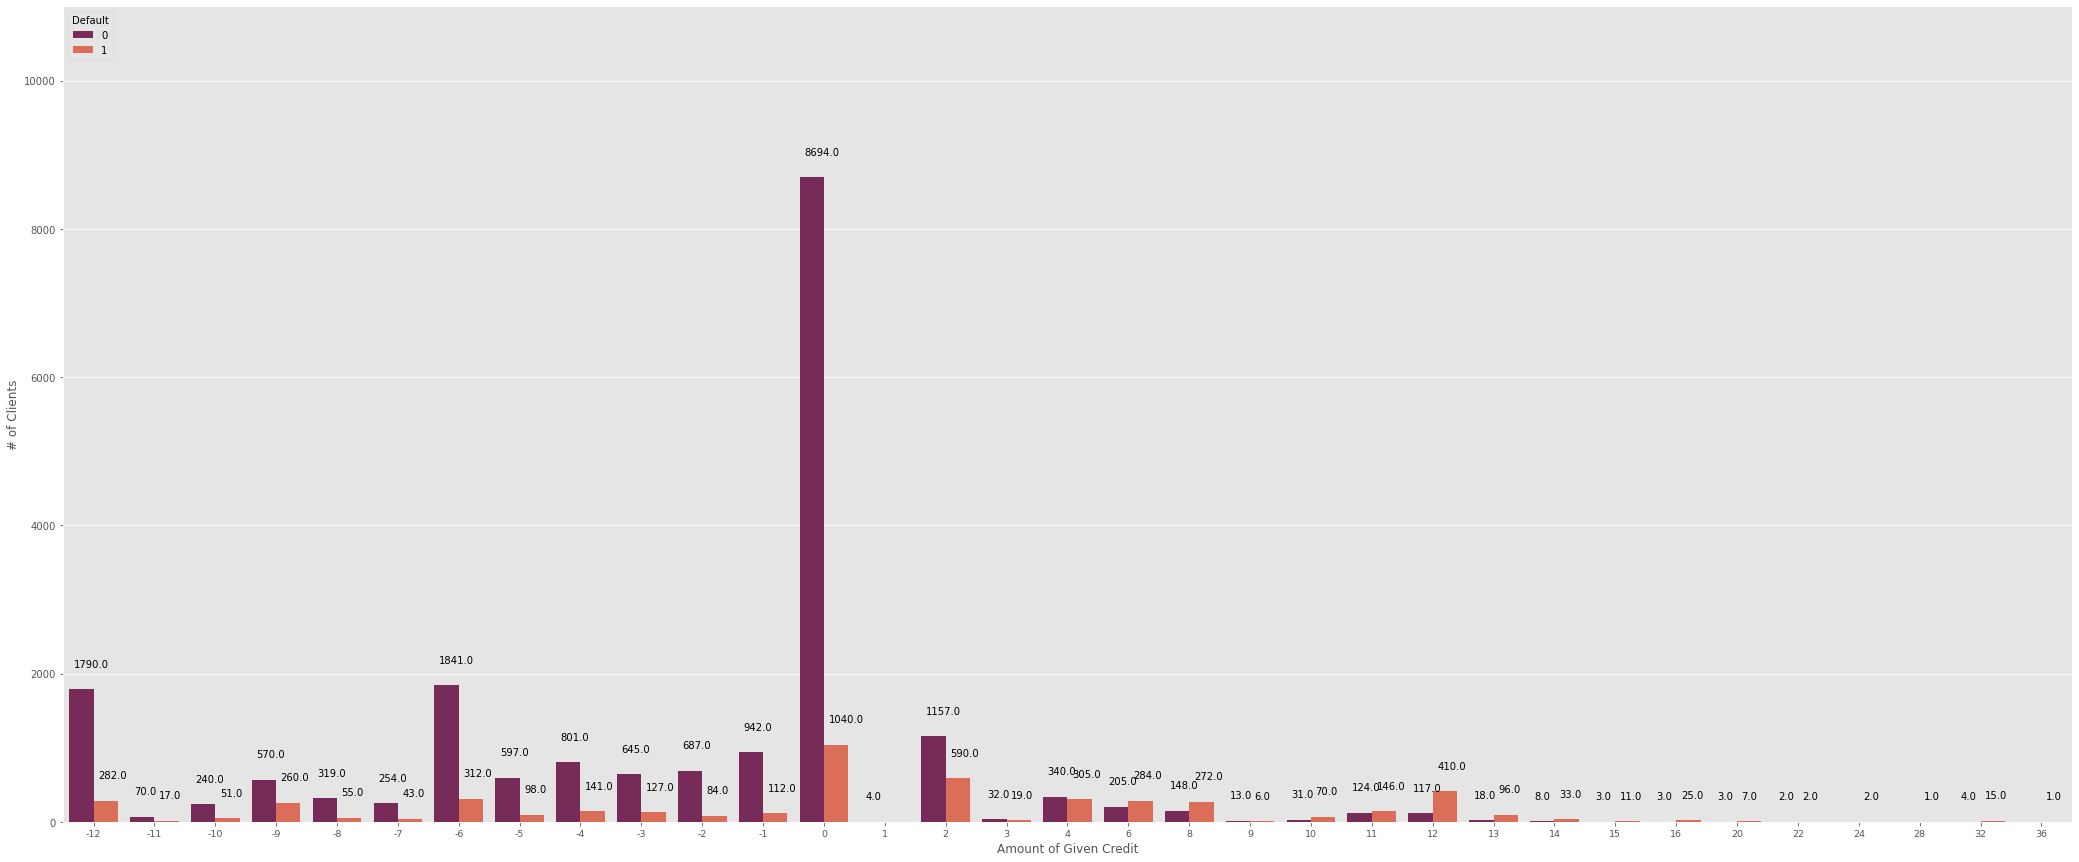

In [1533]:
plt.figure(figsize=(36,15))
ax = sns.countplot(data = df, x = 'somme_pay', hue="Default", palette = 'rocket',)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,11000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [1534]:
#for col in pay_amtx_bins:
#    df[col] = le.fit_transform(df[col])

In [1535]:
df=df[df.somme_pay <14]

In [1536]:
df.shape

(24459, 33)

Text(0, 0.5, 'Pay_1 Amount')

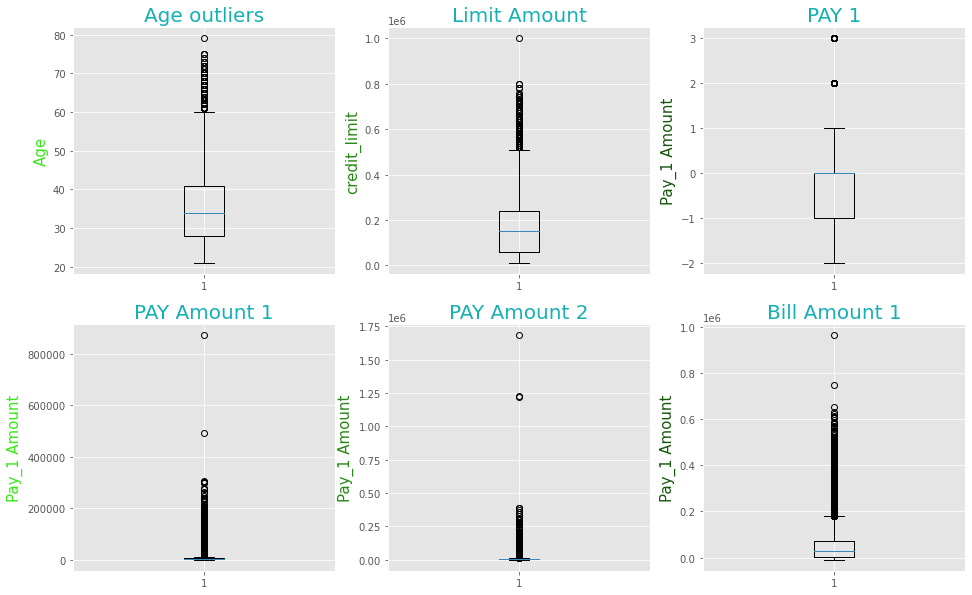

In [1537]:
plt.style.use("ggplot")
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0,0].boxplot(df["AGE"])
axs[0,0].set_title("Age outliers", color="#14B0B3", size=20)
axs[0,0].set_ylabel("Age", color="#36EA15", size = 15)

axs[0,1].boxplot(df["LIMIT_BAL"])
axs[0,1].set_title("Limit Amount", color="#14B0B3", size=20)
axs[0,1].set_ylabel("credit_limit", color="#258912", size = 15)

axs[0,2].boxplot(df["PAY_1"])
axs[0,2].set_title("PAY 1", color="#14B0B3", size=20)
axs[0,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

axs[1,0].boxplot(df["PAY_AMT1"])
axs[1,0].set_title("PAY Amount 1", color="#14B0B3", size=20)
axs[1,0].set_ylabel("Pay_1 Amount", color="#36EA15", size = 15)

axs[1,1].boxplot(df["PAY_AMT2"])
axs[1,1].set_title("PAY Amount 2", color="#14B0B3", size=20)
axs[1,1].set_ylabel("Pay_1 Amount", color="#258912", size = 15)

axs[1,2].boxplot(df["BILL_AMT1"])
axs[1,2].set_title("Bill Amount 1", color="#14B0B3", size=20)
axs[1,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

In [1538]:
df.shape

(24459, 33)

In [1539]:
outlier_columns=["AGE","LIMIT_BAL", "PAY_1", "PAY_2","PAY_3","PAY_4","PAY_5","PAY_6", "PAY_AMT1", "PAY_AMT2","BILL_AMT1","BILL_AMT2"]
age_outlier = []
limitbal_outlier = []
pay1_outlier = []
pay2_outlier = []
pay3_outlier = []
pay4_outlier = []
pay5_outlier = []
pay6_outlier = []
payamt1_outlier = []
payamt2_outlier = []
billamt_outlier = []
billamt2_outlier = []

outliers_array=[age_outlier,limitbal_outlier,pay1_outlier,pay2_outlier,pay3_outlier, pay4_outlier, pay5_outlier, pay6_outlier,payamt1_outlier,payamt2_outlier,billamt_outlier,billamt2_outlier]

def outlier_detect(data):
    for i, column in enumerate(outlier_columns):
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3- Q1
        outlier_step = IQR*1.5

        outlier_values = data[(data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)]
        print("*****", column, "******")
        #print(outlier_values)
        
        outlier_values_and_1 = data[((data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)) & (data["Default"]==1)]
        print("1 ratio is: %",((len(outlier_values_and_1)/len(outlier_values))*100))
        
        outliers_array[i].append(outlier_values_and_1.index)

outlier_detect = outlier_detect(df)


***** AGE ******
1 ratio is: % 26.31578947368421
***** LIMIT_BAL ******
1 ratio is: % 10.559006211180124
***** PAY_1 ******
1 ratio is: % 71.51675485008818
***** PAY_2 ******
1 ratio is: % 67.6063829787234
***** PAY_3 ******
1 ratio is: % 54.90533562822719
***** PAY_4 ******
1 ratio is: % 55.1048951048951
***** PAY_5 ******
1 ratio is: % 56.15942028985508
***** PAY_6 ******
1 ratio is: % 52.020922491678554
***** PAY_AMT1 ******
1 ratio is: % 11.531611754229742
***** PAY_AMT2 ******
1 ratio is: % 9.749894022891056
***** BILL_AMT1 ******
1 ratio is: % 18.156267566048342
***** BILL_AMT2 ******
1 ratio is: % 18.708971553610503


In [1540]:
df.shape

(24459, 33)

In [1541]:
df["dangeroues_cust"]=0

for i in pay1_outlier:
    df["dangeroues_cust"].loc[i]=1

print(df["dangeroues_cust"].value_counts())

0    22837
1     1622
Name: dangeroues_cust, dtype: int64


<ipython-input-1541-b950ee67a8af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dangeroues_cust"]=0
C:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-1541-b950ee67a8af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dangeroues_cust"].loc[i]=1


In [1542]:
df["education_level"]=[0 if i == 0 or i==4 or i==5 else 1 if i ==6 or i==1 else 2  for i in df["EDUCATION"]]

<ipython-input-1542-0224e8a48fdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education_level"]=[0 if i == 0 or i==4 or i==5 else 1 if i ==6 or i==1 else 2  for i in df["EDUCATION"]]


In [1543]:
limit_mean = df["LIMIT_BAL"].mean()
limit_std = df["LIMIT_BAL"].std()
print("Credit limit mean: {:.2f} and standart deviation: {:.2f}".format(limit_mean, limit_std))

Q1= df["LIMIT_BAL"].quantile(.20) 
Q2= df["LIMIT_BAL"].quantile(.40) 
Q3= df["LIMIT_BAL"].quantile(.60) 
Q4= df["LIMIT_BAL"].quantile(.80) 
df["limit_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["LIMIT_BAL"]]

Credit limit mean: 173480.26 and standart deviation: 130351.23


<ipython-input-1543-bc177f72a72e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["limit_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["LIMIT_BAL"]]


In [1544]:
df["dangeroues_cust2"]=0

for i in payamt2_outlier:
    df["dangeroues_cust2"].loc[i]=1

print(df["dangeroues_cust2"].value_counts())

0    24229
1      230
Name: dangeroues_cust2, dtype: int64


<ipython-input-1544-3cf58e431cf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dangeroues_cust2"]=0
<ipython-input-1544-3cf58e431cf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dangeroues_cust2"].loc[i]=1


In [1545]:
df["total_payment"]=df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"]

df["repay_cust"]=1
repay_cust = df[(df["total_payment"]>df["LIMIT_BAL"]) & (df["Default"]==0)].index
for i in repay_cust:
    df["repay_cust"].loc[i]=0

<ipython-input-1545-4c3f5381262a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_payment"]=df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"]
<ipython-input-1545-4c3f5381262a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["repay_cust"]=1
C:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [1546]:
df["pays_means"]=0
def mean_grades(data, column):
    for i in range(1,7):
        data[column] += data["PAY_"+str(i)]
    data[column]=data[column]/i

mean_grades(df, "pays_means")


pay_mean = df["pays_means"].mean()
pay_std = df["pays_means"].std()
pay_min = df["pays_means"].min()
pay_max = df["pays_means"].max()
print("for grades:\n pay mean:{:.2f}\n pay standart dev.:{:.2f}\n pay min: {}\n pay max: {}".format(pay_mean,pay_std,pay_min, pay_max))
df["pays_means"]=[0 if i<(pay_mean-pay_std) else 2 if i>(pay_mean+pay_std) else 1 for i in df["pays_means"] ]

<ipython-input-1546-12b082668d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pays_means"]=0


for grades:
 pay mean:-0.29
 pay standart dev.:0.89
 pay min: -2.0
 pay max: 2.1666666666666665


<ipython-input-1546-12b082668d93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] += data["PAY_"+str(i)]
<ipython-input-1546-12b082668d93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=data[column]/i
<ipython-input-1546-12b082668d93>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [1547]:
Q1= df["AGE"].quantile(.20) 
Q2= df["AGE"].quantile(.40) 
Q3= df["AGE"].quantile(.60) 
Q4= df["AGE"].quantile(.80) 
df["AGE_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["AGE"]]

<ipython-input-1547-f3412e0d5900>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AGE_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["AGE"]]


In [1548]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   

   ...  payment_1_eng  somme_pay  dangeroues_cust  education_level  \
2  ...              0          0                0                2   
3  ...              0          0                0                2   
4  ...              1         -2                0                2   
5  ...              0          0                0                1   
6  ...              0          0                0                1   

   limit_class  dangeroues_cust2  total_payment  repay_cust  pays_means  \
2            1                 0        11018.0           1           1   
3            1                 0         8388.0           1           1   
4            1                 0        59049.0           0           1   
5            1                 0         7772.0           1           1   
6            5                 0       180759.0           1           1   

   AGE_class  
2          2  
3          4  
4          5  
5          4  
6          1  

[5 rows x 41 columns]

In [1603]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin',
       'PAY_AMT5_bin', 'PAY_AMT6_bin', 'payment_1_eng', 'somme_pay',
       'dangeroues_cust', 'education_level', 'limit_class', 'dangeroues_cust2',
       'total_payment', 'repay_cust', 'pays_means', 'AGE_class'],
      dtype='object')

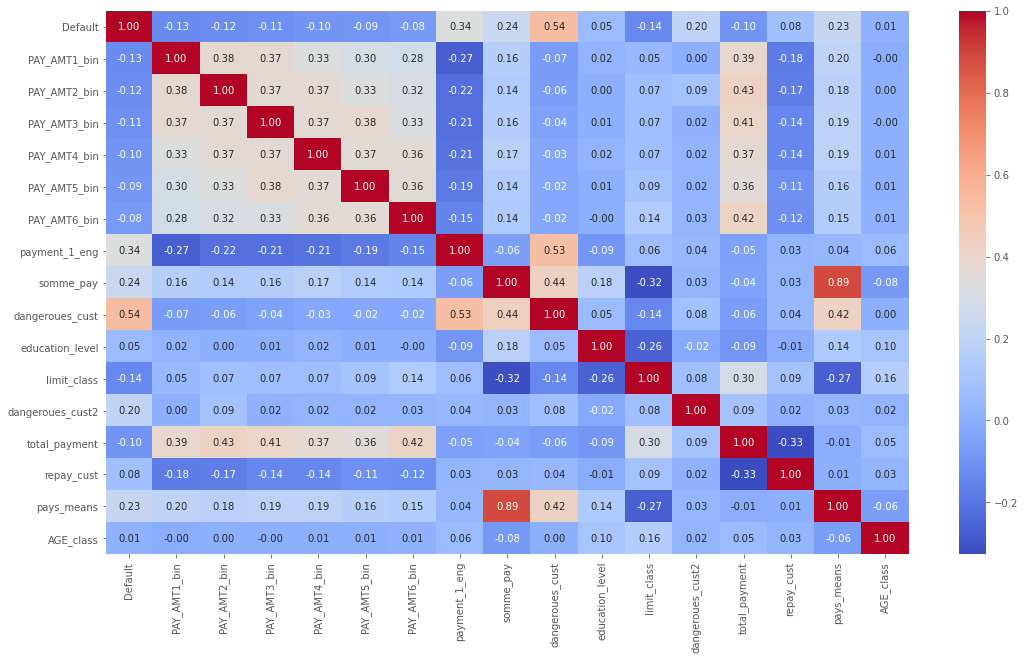

In [1621]:
data2=pd.DataFrame(df.iloc[:,24:])
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

In [1622]:
data2['MARRIAGE'] =df['MARRIAGE']
data2['PAY_1'] =df['PAY_1']

In [1623]:
data2.columns

Index(['Default', 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin',
       'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin', 'payment_1_eng',
       'somme_pay', 'dangeroues_cust', 'education_level', 'limit_class',
       'dangeroues_cust2', 'total_payment', 'repay_cust', 'pays_means',
       'AGE_class', 'MARRIAGE', 'PAY_1'],
      dtype='object')

In [1624]:
data2.head()

Default  PAY_AMT1_bin  PAY_AMT2_bin  PAY_AMT3_bin  PAY_AMT4_bin  \
2        0             1             1             1             1   
3        0             1             1             1             1   
4        0             1             2             1             1   
5        0             1             1             1             1   
6        0             3             2             2             1   

   PAY_AMT5_bin  PAY_AMT6_bin  payment_1_eng  somme_pay  dangeroues_cust  \
2             1             1              0          0                0   
3             1             1              0          0                0   
4             1             1              1         -2                0   
5             1             1              0          0                0   
6             1             1              0          0                0   

   education_level  limit_class  dangeroues_cust2  total_payment  repay_cust  \
2                2            1                 0        11018.0           1   
3                2            1                 0         8388.0           1   
4                2            1                 0        59049.0           0   
5                1            1                 0         7772.0           1   
6                1            5                 0       180759.0           1   

   pays_means  AGE_class  MARRIAGE  PAY_1  
2           1          2         2      0  
3           1          4         1      0  
4           1          5         1     -1  
5           1          4         2      0  
6           1          1         2      0

In [1625]:
data2.head()

Default  PAY_AMT1_bin  PAY_AMT2_bin  PAY_AMT3_bin  PAY_AMT4_bin  \
2        0             1             1             1             1   
3        0             1             1             1             1   
4        0             1             2             1             1   
5        0             1             1             1             1   
6        0             3             2             2             1   

   PAY_AMT5_bin  PAY_AMT6_bin  payment_1_eng  somme_pay  dangeroues_cust  \
2             1             1              0          0                0   
3             1             1              0          0                0   
4             1             1              1         -2                0   
5             1             1              0          0                0   
6             1             1              0          0                0   

   education_level  limit_class  dangeroues_cust2  total_payment  repay_cust  \
2                2            1                 0        11018.0           1   
3                2            1                 0         8388.0           1   
4                2            1                 0        59049.0           0   
5                1            1                 0         7772.0           1   
6                1            5                 0       180759.0           1   

   pays_means  AGE_class  MARRIAGE  PAY_1  
2           1          2         2      0  
3           1          4         1      0  
4           1          5         1     -1  
5           1          4         2      0  
6           1          1         2      0

In [1626]:
X_2=data2.drop(columns=['Default'],axis=1)
y_2=data2['Default']
#X_2=data2.drop(axis=1)

#scaled = (x - xmin) / (xmax - xmin)  for logistic regression
X_2["total_payment"] = (X_2["total_payment"]- X_2["total_payment"].min()) /  (X_2["total_payment"].max()- X_2["total_payment"].min()) 
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_2,y_2,test_size=0.35,random_state=0)

In [1627]:
reg_xgb.fit(X_train_2, y_train_2)
y_pred_xgb =reg_xgb.predict(X_test_2)
score_xgb_2=accuracy_score(y_pred_xgb,y_test_2)*100
print("Xgboost SCORE:{:.3f}".format(score_xgb_2))

rf_model.fit(X_train_2, y_train_2)
y_pred_rfc = rf_model.predict(X_test_2)
score_rfc_2=accuracy_score(y_pred_rfc,y_test_2)*100
print("RandomForestClassifier SCORE:{:.3f}".format(score_rfc_2))

log_reg = LogisticRegression(n_jobs=-1,solver='liblinear')
log_reg.fit(X_train_2, y_train_2)
y_pred_log_2 = log_reg.predict(X_test_2)
score_log_2=accuracy_score(y_pred_log_2,y_test_2)*100
print("Logistic Regression SCORE:{:.3f}".format(score_log_2))

C:\Users\ilyes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost SCORE:87.864
RandomForestClassifier SCORE:85.224
Logistic Regression SCORE:87.887


C:\Users\ilyes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [1628]:
cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model_new.fit(X_train_2, y_train_2, early_stopping_rounds = 100, eval_set = [(X_test_2,y_test_2)])
pred_cat_new = cat_model_new.predict(X_test_2)

['MARRIAGE', 'payment_1_eng', 'somme_pay', 'dangeroues_cust', 'education_level', 'limit_class', 'dangeroues_cust2', 'total_payment', 'repay_cust', 'pays_means', 'AGE_class', 'MARRIAGE', 'PAY_1']
Learning rate set to 0.062754
0:	test: 0.7667603	best: 0.7667603 (0)	total: 6.64ms	remaining: 6.64s
1:	test: 0.7699496	best: 0.7699496 (1)	total: 13.1ms	remaining: 6.55s
2:	test: 0.7842248	best: 0.7842248 (2)	total: 19.4ms	remaining: 6.44s
3:	test: 0.7883499	best: 0.7883499 (3)	total: 27.3ms	remaining: 6.8s
4:	test: 0.8065757	best: 0.8065757 (4)	total: 34ms	remaining: 6.76s
5:	test: 0.8102555	best: 0.8102555 (5)	total: 42.3ms	remaining: 7.01s
6:	test: 0.8111119	best: 0.8111119 (6)	total: 50ms	remaining: 7.09s
7:	test: 0.8124360	best: 0.8124360 (7)	total: 57.1ms	remaining: 7.08s
8:	test: 0.8105675	best: 0.8124360 (7)	total: 64.2ms	remaining: 7.07s
9:	test: 0.8106911	best: 0.8124360 (7)	total: 70.8ms	remaining: 7.01s
10:	test: 0.8133628	best: 0.8133628 (10)	total: 77.4ms	remaining: 6.96s
11:	test

121:	test: 0.8245412	best: 0.8246626 (106)	total: 762ms	remaining: 5.48s
122:	test: 0.8245249	best: 0.8246626 (106)	total: 768ms	remaining: 5.48s
123:	test: 0.8244476	best: 0.8246626 (106)	total: 775ms	remaining: 5.47s
124:	test: 0.8244665	best: 0.8246626 (106)	total: 781ms	remaining: 5.47s
125:	test: 0.8243686	best: 0.8246626 (106)	total: 788ms	remaining: 5.46s
126:	test: 0.8243474	best: 0.8246626 (106)	total: 794ms	remaining: 5.46s
127:	test: 0.8243025	best: 0.8246626 (106)	total: 801ms	remaining: 5.45s
128:	test: 0.8242740	best: 0.8246626 (106)	total: 807ms	remaining: 5.45s
129:	test: 0.8243020	best: 0.8246626 (106)	total: 813ms	remaining: 5.44s
130:	test: 0.8243792	best: 0.8246626 (106)	total: 819ms	remaining: 5.43s
131:	test: 0.8243273	best: 0.8246626 (106)	total: 825ms	remaining: 5.43s
132:	test: 0.8242302	best: 0.8246626 (106)	total: 831ms	remaining: 5.42s
133:	test: 0.8242286	best: 0.8246626 (106)	total: 837ms	remaining: 5.41s
134:	test: 0.8242639	best: 0.8246626 (106)	total: 8

245:	test: 0.8244255	best: 0.8250634 (177)	total: 1.55s	remaining: 4.76s
246:	test: 0.8244183	best: 0.8250634 (177)	total: 1.56s	remaining: 4.76s
247:	test: 0.8243969	best: 0.8250634 (177)	total: 1.57s	remaining: 4.75s
248:	test: 0.8243693	best: 0.8250634 (177)	total: 1.57s	remaining: 4.74s
249:	test: 0.8243613	best: 0.8250634 (177)	total: 1.58s	remaining: 4.74s
250:	test: 0.8242643	best: 0.8250634 (177)	total: 1.58s	remaining: 4.73s
251:	test: 0.8241784	best: 0.8250634 (177)	total: 1.59s	remaining: 4.72s
252:	test: 0.8241724	best: 0.8250634 (177)	total: 1.6s	remaining: 4.71s
253:	test: 0.8240533	best: 0.8250634 (177)	total: 1.6s	remaining: 4.71s
254:	test: 0.8240634	best: 0.8250634 (177)	total: 1.61s	remaining: 4.7s
255:	test: 0.8240776	best: 0.8250634 (177)	total: 1.61s	remaining: 4.69s
256:	test: 0.8241334	best: 0.8250634 (177)	total: 1.62s	remaining: 4.68s
257:	test: 0.8241546	best: 0.8250634 (177)	total: 1.63s	remaining: 4.68s
258:	test: 0.8242427	best: 0.8250634 (177)	total: 1.63

In [1629]:
print("Test Accuracy: ",metrics.accuracy_score(y_test_2, pred_cat_new))

Test Accuracy:  0.8805046139469688


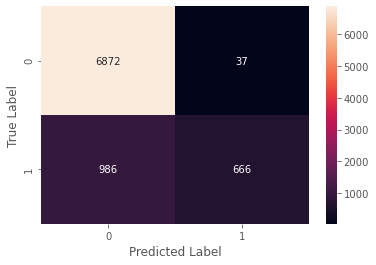

In [1630]:
cat_new_confusion_matrix = metrics.confusion_matrix(y_test_2, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

ROC_AUC:  0.6988961830675291


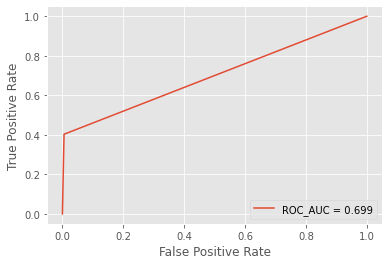

In [1632]:
cat_pred_proba = cat_model_new.predict_proba(X_test_2)[:,1]

cat_roc_auc = metrics.roc_auc_score(y_test_2, pred_cat_new)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(y_test_2, pred_cat_new)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()